# ***Machine Learning - II [Telecom Churn Case Study]***

# **Problem Statement**

> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition


> For many incumbent operators, retaining high profitable customers is the number one business goal.To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 
**In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.**

# ***Telecom Churn Case Study - Solution***

## ***Step 1: Import and inspect the data.***

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_colwidth', 256)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
#Mount the dataset into the Google drive
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#Copy the content in the csv file to a dataframe ="telecomData"
path =  "telecom_churn_data.csv"
telecomData = pd.read_csv(path)

In [5]:
#Display the contents of the csv file
telecomData.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
#Number of rows and columns in the dataset. 
telecomData.shape

(99999, 226)

***- The above data has 99999 rows and 226 columns***


## ***Step 2: Data Cleaning - Handling Missing values in the data.***

In [7]:
#Percentage of missing values in each column.
nullseries = round(telecomData.isnull().sum() * 100 / len(telecomData),2)
print(nullseries[nullseries > 0])

loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou

- *From the initial inspection of data, we can observe that the there are missing values and depending on the type of missing values, we might need to impute them or drop them.*

In [8]:
print(telecomData.columns) ##inspecting the columns
print(telecomData.shape)   ##inspecting the shape
print(telecomData.dtypes) ##inspecting the datatypes of variables

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)
(99999, 226)
mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_

- *The dataframe consists of all column in float64 dtype, however we need to inspect more to understand if it is categorical or numerical column*



```
- Circle ID - 109 for all customers
- WKT the last date for each of the month and hence does not add value to our analysis. 
- All the other columns "loc_og_t20_mou' , "std_og_t20_mou" , "loc_ic_t20_mou" have only 0 or NaN values and the missing value percentage < 2 %. Hence we can directly drop such columns. 
```



In [9]:
#There are some columns that have the same value throughout and does not add much value to the Data. 
constantColumns = ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9']

In [10]:
#Understanding the value counts of such columns.
for col in constantColumns:
    print(telecomData[col].value_counts)
    print()

<bound method IndexOpsMixin.value_counts of 0        109
1        109
2        109
3        109
4        109
        ... 
99994    109
99995    109
99996    109
99997    109
99998    109
Name: circle_id, Length: 99999, dtype: int64>

<bound method IndexOpsMixin.value_counts of 0        6/30/2014
1        6/30/2014
2        6/30/2014
3        6/30/2014
4        6/30/2014
           ...    
99994    6/30/2014
99995    6/30/2014
99996    6/30/2014
99997    6/30/2014
99998    6/30/2014
Name: last_date_of_month_6, Length: 99999, dtype: object>

<bound method IndexOpsMixin.value_counts of 0        7/31/2014
1        7/31/2014
2        7/31/2014
3        7/31/2014
4        7/31/2014
           ...    
99994    7/31/2014
99995    7/31/2014
99996    7/31/2014
99997    7/31/2014
99998    7/31/2014
Name: last_date_of_month_7, Length: 99999, dtype: object>

<bound method IndexOpsMixin.value_counts of 0        8/31/2014
1        8/31/2014
2        8/31/2014
3        8/31/2014
4        8/31/2014
   

- *These columns have a constant value throughout the datatframe*
- *Variance for these columns = 0.0*
- *This does not add too much value to our analysis as columns like LastDayOfMonth is constant for each month and do not provide any extra information*

In [11]:
#DataFrame after dropping columns with same value. 
telecomData = telecomData.drop(constantColumns, axis = 1) 

In [12]:
#DataFrame after dropping columns with same value.
telecomData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,08-08-14,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,08-08-14,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.

In [13]:
#After dropping these columns we have, 210 columns.
telecomData.shape

(99999, 210)

## ***Missing Values in Each Column***

### ***Last Recharge Date Columns***

In [14]:
nullseries = round(telecomData.isnull().sum() * 100 / len(telecomData),2)
print(nullseries[nullseries> 0])

onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou_7             3.86
loc_og_t2f_mou_8             5.38
loc_og_t2f_mou_9             7.75
loc_og_t2c_mou_6             3.94
loc_og_t2c_mou

In [15]:
#Calculating the missing value percentages in the last recharge columns
dateOfLastRecharge = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' ]

In [16]:
#Calculating the missing value percentages in the last date of recharge for Data columns
dateOfLastRechargeData = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' ]

In [17]:
#Understanding the variance of Date columns
for col in dateOfLastRechargeData:
    print(telecomData[col].value_counts())
    print()

6/30/2014    1888
6/29/2014    1651
6/28/2014    1643
6/26/2014    1384
6/27/2014    1333
6/25/2014    1108
6/24/2014    1067
6/22/2014     903
6/23/2014     893
6/21/2014     861
6/17/2014     859
6/19/2014     813
6/20/2014     779
6/18/2014     773
6/14/2014     739
6/16/2014     731
06-12-14      660
6/15/2014     656
6/13/2014     631
06-11-14      629
06-10-14      626
06-09-14      607
06-06-14      591
06-05-14      584
06-07-14      517
06-08-14      514
06-03-14      495
06-04-14      464
06-02-14      423
06-01-14      331
Name: date_of_last_rech_data_6, dtype: int64

7/31/2014    1813
7/29/2014    1719
7/30/2014    1665
7/28/2014    1581
7/26/2014    1239
7/27/2014    1214
7/25/2014     996
7/24/2014     882
7/23/2014     841
7/22/2014     830
7/21/2014     813
7/14/2014     769
7/19/2014     761
7/18/2014     746
7/17/2014     703
7/20/2014     692
7/16/2014     691
07-07-14      661
07-12-14      655
7/13/2014     644
07-09-14      640
07-10-14      627
7/15/2014     606


In [18]:
#Understanding the date of last recharge for network. 
for col in dateOfLastRecharge:
    print(telecomData[col].value_counts())
    print()

6/30/2014    16960
6/29/2014    12918
6/27/2014    11169
6/28/2014     9491
6/26/2014     5530
6/25/2014     4896
6/17/2014     4145
6/24/2014     4129
6/14/2014     3845
6/21/2014     3747
6/23/2014     2908
6/18/2014     2747
06-12-14      2511
6/22/2014     2344
6/13/2014     2147
6/19/2014     2009
6/20/2014     1803
6/16/2014     1126
6/15/2014      873
06-11-14       579
06-08-14       520
06-05-14       327
06-07-14       322
06-10-14       283
06-03-14       233
06-01-14       218
06-09-14       199
06-06-14       173
06-04-14       131
06-02-14       109
Name: date_of_last_rech_6, dtype: int64

7/31/2014    17288
7/30/2014    13863
7/25/2014     9401
7/29/2014     9052
7/28/2014     7502
7/27/2014     5909
7/26/2014     5382
7/24/2014     3998
7/19/2014     3057
7/22/2014     2969
7/20/2014     2892
7/17/2014     2737
7/16/2014     2458
7/23/2014     2302
7/21/2014     1640
7/15/2014     1562
7/18/2014     1280
07-10-14       859
07-09-14       827
07-12-14       732
7/14/2014

In [19]:
#Missing Value For All Last Recharge Columns :
for col in dateOfLastRecharge: 
  nullseries = round(telecomData[col].isnull().sum() * 100 / len(telecomData),2)
  print(nullseries[nullseries> 0])

[1.61]
[1.77]
[3.62]
[4.76]


In [20]:
#Missing Value For All Last Recharge Columns :
for col in dateOfLastRechargeData: 
  nullseries = round(telecomData[col].isnull().sum() * 100 / len(telecomData),2)
  print(nullseries[nullseries> 0])

[74.85]
[74.43]
[73.66]
[74.08]


#### *Transferring the date columns to Days*

In [21]:
telecomData['date_of_last_rech_6'] = telecomData['date_of_last_rech_6'].astype(str)
telecomData['date_of_last_rech_7'] = telecomData['date_of_last_rech_7'].astype(str)
telecomData['date_of_last_rech_8'] = telecomData['date_of_last_rech_8'].astype(str)
telecomData['date_of_last_rech_9'] = telecomData['date_of_last_rech_9'].astype(str)

In [22]:
telecomData['date_of_last_rech_data_6'] = telecomData['date_of_last_rech_data_6'].astype(str)
telecomData['date_of_last_rech_data_7'] = telecomData['date_of_last_rech_data_7'].astype(str)
telecomData['date_of_last_rech_data_8'] = telecomData['date_of_last_rech_data_8'].astype(str)
telecomData['date_of_last_rech_data_9'] = telecomData['date_of_last_rech_data_9'].astype(str)

In [23]:
telecomData['date_of_last_rech_6'] = pd.to_datetime(telecomData.date_of_last_rech_6).dt.day
telecomData['date_of_last_rech_7'] = pd.to_datetime(telecomData.date_of_last_rech_7).dt.day
telecomData['date_of_last_rech_8'] = pd.to_datetime(telecomData.date_of_last_rech_8).dt.day
telecomData['date_of_last_rech_9'] = pd.to_datetime(telecomData.date_of_last_rech_9).dt.day

In [24]:
telecomData['date_of_last_rech_data_6'] = pd.to_datetime(telecomData.date_of_last_rech_data_6).dt.day
telecomData['date_of_last_rech_data_7'] = pd.to_datetime(telecomData.date_of_last_rech_data_7).dt.day
telecomData['date_of_last_rech_data_8'] = pd.to_datetime(telecomData.date_of_last_rech_data_8).dt.day
telecomData['date_of_last_rech_data_9'] = pd.to_datetime(telecomData.date_of_last_rech_data_9).dt.day

In [25]:
#Printing after inspection of date columns
telecomData.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,21.0,16.0,8.0,28.0,252,252,252,0,21.0,16.0,8.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,70


**Details of missing values:** 
```
date_of_last_rech_6 - 1.61; Mode : "6/30/2014"
date_of_last_rech_7 - 1.77; Mode : "7/31/2014"
date_of_last_rech_8 - 3.62; Mode : "8/31/2014"
date_of_last_rech_9 - 4.76; Mode : "9/29/2014"
```



- *Since it is not sure as to how to perform imputation on such missing values and replacing it with 0 does not make sense since it is a date column, we will apply advanced imputation techniques to handle such data.*

- *For missing values > 75%, we can directly drop them and this has been done in further stages.*

In [26]:
#Missing Value For All Last Recharge Columns :
for col in dateOfLastRecharge: 
  nullseries = round(telecomData[col].isnull().sum() * 100 / len(telecomData),2)
  print(nullseries[nullseries> 0])

[1.61]
[1.77]
[3.62]
[4.76]


### ***Recharge columns***

- ***Recharge columns are such columns that help us to understand if the customer has recharged or not, and if there has not been any recharge - we can safely remove such customers as they do provide any extra information.***

In [27]:
rechargeColumns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
telecomData[rechargeColumns].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [28]:
telecomData.loc[telecomData.total_rech_data_6.isnull() & telecomData.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


- *In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.*



In [29]:
#Imputing all the cascading rows to 0. 
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [30]:
#Applying 0 Impute to all the columns
telecomData[zero_impute] = telecomData[zero_impute].apply(lambda x: x.fillna(0))

### ***Categorical Columns***

In [31]:
#Inspecting the possible categorical columns. 
categoricalcols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

In [32]:
#Printing the value counts in categorical columsn that helps us to understand binary or mutlicategory columns.
for col in categoricalcols: 
  print(telecomData[col].value_counts())
  print()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64

0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64

0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64

1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64

1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64



- ***The above cols have only 0 or 1, we shall check the missing value percentage.***

In [33]:
#Checking for missing value percentage in the categorical columns
for col in categoricalcols: 
  print(round(telecomData[col].isnull().sum() * 100 / len(telecomData),2))

74.85
74.43
73.66
74.08
74.85
74.43
73.66
74.08


In [34]:
#Replacing all the values by 0 
for col in categoricalcols: 
  telecomData[col].fillna(0, inplace=True)

- *By replacing it with 0 - it means the customer is not an FB user and he has not availed any night user pack*

In [35]:
#Checking for percentage in missing values after imputing it with 0 
for col in categoricalcols: 
  print(round(telecomData[col].isnull().sum() * 100 / len(telecomData),2))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [36]:
#Converting these columns as categorical columns. 
for col in categoricalcols:
  telecomData[col] = telecomData[col].astype('category')

In [37]:
#Checking the categorical columns for any data imbalance 
for col in categoricalcols: 
  print(telecomData[col].value_counts(normalize = True))
  print()

0.0    0.99369
1.0    0.00631
Name: night_pck_user_6, dtype: float64

0.0    0.99411
1.0    0.00589
Name: night_pck_user_7, dtype: float64

0.0    0.99451
1.0    0.00549
Name: night_pck_user_8, dtype: float64

0.0    0.99586
1.0    0.00414
Name: night_pck_user_9, dtype: float64

0.0    0.769998
1.0    0.230002
Name: fb_user_6, dtype: float64

0.0    0.767618
1.0    0.232382
Name: fb_user_7, dtype: float64

0.0    0.765368
1.0    0.234632
Name: fb_user_8, dtype: float64

0.0    0.776818
1.0    0.223182
Name: fb_user_9, dtype: float64



- ***By imputing with 0 - it means that the user has not chose for night pack/ he is not a FB user***
- ***Night Pack user has high data imbalance - 99.00% and 1.00% and hence it does not make sense to keep those columns, we can drop them.***

In [38]:
#Collecting all the night pack user columns as they are highly imbalanced.
nightPackUser = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

In [39]:
#DataFrame after dropping columns [Night_pack_user] 
telecomData = telecomData.drop(nightPackUser, axis = 1) 

### ***High Missing Value Percentages***

#### **Data related Columns**



In [40]:
#Percentage of missing values in each column.
nullseries = round(telecomData.isnull().sum() * 100 / len(telecomData),2)
print(nullseries[nullseries > 30])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64


##### ***June***

In [41]:
#Imputing all the above columns where the missing percentage was > 70% to be imputed with 0. [It means that the customer has not recharged]
june = ['count_rech_2g_6','count_rech_3g_6','arpu_3g_6','arpu_2g_6']

In [42]:
#Imputing meaningful missing with 0. 
for col in june: 
  telecomData[col].fillna(0, inplace = True)

##### ***July***

In [43]:
#Imputing all the above columns where the missing percentage was > 70% to be imputed with 0. [It means that the customer has not recharged]
july = ['count_rech_2g_7','count_rech_3g_7','arpu_3g_7','arpu_2g_7']

In [44]:
#Imputing meaningful missing with 0. 
for col in july: 
  telecomData[col].fillna(0, inplace = True)

##### ***August***

In [45]:
#Imputing all the above columns where the missing percentage was > 70% to be imputed with 0. [It means that the customer has not recharged]
aug = ['count_rech_2g_8','count_rech_3g_8','arpu_3g_8','arpu_2g_8']

In [46]:
#Imputing meaning ful missing with 0. 
for col in aug: 
  telecomData[col].fillna(0, inplace = True)

In [47]:
#Imputing all the above columns where the missing percentage was > 70% to be imputed with 0. [It means that the customer has not recharged]
sept = ['count_rech_2g_9','count_rech_3g_9','arpu_3g_9','arpu_2g_9']

In [48]:
#Imputing meaning ful missing with 0.
for col in sept: 
  telecomData[col].fillna(0, inplace = True)

#### ***Missing value > 70%***

- ***Removing other columns that have missing value > 70 , and these does not add value to our investigation as they are date columns having missing value > 0***

In [49]:
nullseries = round(telecomData.isnull().sum() * 100 / len(telecomData),2)
print(nullseries[nullseries > 30])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
dtype: float64


In [50]:
#Displaying all date columns
cols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

In [51]:
#DataFrame after dropping columns with same value. 
telecomData = telecomData.drop(cols, axis = 1) 

In [52]:
#Printing all the missing value columns.
nullseries = round(telecomData.isnull().sum() * 100 / len(telecomData),2)
print(nullseries[nullseries> 0])

onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9       7.75
loc_og_mou_6           3.94
loc_og_mou_7           3.86
loc_og_mou_8           5.38
loc_og_mou_9        

## ***Step 3: Filter High Value Customers***

In [53]:
#Finding the total number of times a phone was recharged, [Data = 2g count + 3g count]
telecomData['num_of_time_data_recharged_6']=telecomData['count_rech_2g_6']+telecomData['count_rech_3g_6']
telecomData['num_of_time_data_recharged_7']=telecomData['count_rech_2g_7']+telecomData['count_rech_3g_7']
telecomData['num_of_time_data_recharged_8']=telecomData['count_rech_2g_8']+telecomData['count_rech_3g_8']

#Finding Total amount spent on recharging the data: [no of times it was recharged * avg amount recharged.]
telecomData['total_amt_spent_data_6']= telecomData['num_of_time_data_recharged_6']*telecomData['av_rech_amt_data_6']
telecomData['total_amt_spent_data_7']= telecomData['num_of_time_data_recharged_7']*telecomData['av_rech_amt_data_7']
telecomData['total_amt_spent_data_8']= telecomData['num_of_time_data_recharged_8']*telecomData['av_rech_amt_data_8']

#Finding Total amount spent on recharging [Data and Calls]
telecomData['total_amt_spend_rech_6']=telecomData['total_rech_amt_6']+telecomData['total_amt_spent_data_6']
telecomData['total_amt_spend_rech_7']=telecomData['total_rech_amt_7']+telecomData['total_amt_spent_data_7']
telecomData['total_amt_spend_rech_8']=telecomData['total_rech_amt_8']+telecomData['total_amt_spent_data_8']

#No need to derive the above variables for 9th month as anyways we will be dropping them

In [54]:
#Average Amount in GoodPhase
telecomData['avg_recharge_amt_6_7']= (telecomData['total_amt_spend_rech_6'] + telecomData['total_amt_spend_rech_7'])/2
telecomData.loc[:,['total_rech_amt_6','total_rech_amt_7','avg_recharge_amt_6_7']].head()

,total_rech_amt_6,total_rech_amt_7,avg_recharge_amt_6_7
0,362,252,559.0
1,74,384,306.0
2,168,315,241.5
3,230,310,270.0
4,196,350,301.0


In [55]:
#Calculating the 70th percentile
seventy_quantile=telecomData['avg_recharge_amt_6_7'].quantile(0.7)
seventy_quantile

478.0

In [56]:
#High Value Customer : Greater than 70th percentile. 
hvc_data=telecomData.loc[telecomData['avg_recharge_amt_6_7']>=seventy_quantile]

In [57]:
#Printing the High value customer
hvc_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,num_of_time_data_recharged_6,num_of_time_data_recharged_7,num_of_time_data_recharged_8,total_amt_spent_data_6,total_amt_spent_data_7,total_amt_spent_data_8,total_amt_spend_rech_6,total_amt_spend_rech_7,total_amt_spend_rech_8,avg_recharge_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,21.0,16.0,8.0,28.0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0

In [58]:
#Shape of the dataframe after filtering high value customers 
hvc_data.shape

(30001, 212)

## ***Step 4 : Derive Churn Variable***

- ***The target column called "Churn" has not been derived/ provided in the dataset so we have to derive it on our own***

In [59]:
#Function to assign churn on the data : 0: customer has churned and 1 : customer has not churned.
def assign_churn(hvc_data):
    churn_deciding_cols= ['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']
    status = ~hvc_data[[col for col in churn_deciding_cols ]].any(axis=1)
    status = status.map({True:1, False:0})
    return status

        
hvc_data['churn']=assign_churn(hvc_data)

In [60]:
#Inspecting the churn column. 
hvc_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,num_of_time_data_recharged_6,num_of_time_data_recharged_7,num_of_time_data_recharged_8,total_amt_spent_data_6,total_amt_spent_data_7,total_amt_spent_data_8,total_amt_spend_rech_6,total_amt_spend_rech_7,total_amt_spend_rech_8,avg_recharge_amt_6_7,churn
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,21.0,16.0,8.0,28.0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0,0,0,0,0,0,0,0,1,1,1

In [61]:
#Calculate Percentage of churn: 
print("The percentages of churned users: ",round(len(hvc_data[hvc_data.churn == 1])/hvc_data.shape[0] *100,2))

The percentages of churned users:  8.14


In [62]:
#Rename the columns
hvc_data.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 
                     'jul_vbc_3g':'vbc_3g_7',
                     'aug_vbc_3g': 'vbc_3g_8',
                     'sep_vbc_3g':'vbc_3g_9' }, inplace=True )

## ***Step 5: Delete Columns belonging to churn month***

- ***Churn Month - September ; Since we are predicting on this dataset , we do not include columns that belong to September***

In [63]:
#Storing all the columns belonging to the churn month. 
cols_9=[col for col in hvc_data.columns if "_9" in col]

In [64]:
#Displaying all the churn month columns
cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9']

In [65]:
#Since this data does not help in model building, we remove columns belonging to the churn month
hvc_data.drop(cols_9,inplace=True,axis=1)

In [66]:
#Inspecting the shape of the data after churn
hvc_data.shape

(30001, 163)

## ***Step 6: KNN imputation with Sklearn***

In [67]:
#Getting columns where there are missing values
nan_cols = [i for i in hvc_data.columns if hvc_data[i].isnull().any()]

In [68]:
#Printing null series in the high value customer data.
nullseries = round(hvc_data.isnull().sum() * 100 / len(hvc_data),2)
print(nullseries[nullseries> 0])

onnet_mou_6            1.82
onnet_mou_7            1.79
onnet_mou_8            3.91
offnet_mou_6           1.82
offnet_mou_7           1.79
offnet_mou_8           3.91
roam_ic_mou_6          1.82
roam_ic_mou_7          1.79
roam_ic_mou_8          3.91
roam_og_mou_6          1.82
roam_og_mou_7          1.79
roam_og_mou_8          3.91
loc_og_t2t_mou_6       1.82
loc_og_t2t_mou_7       1.79
loc_og_t2t_mou_8       3.91
loc_og_t2m_mou_6       1.82
loc_og_t2m_mou_7       1.79
loc_og_t2m_mou_8       3.91
loc_og_t2f_mou_6       1.82
loc_og_t2f_mou_7       1.79
loc_og_t2f_mou_8       3.91
loc_og_t2c_mou_6       1.82
loc_og_t2c_mou_7       1.79
loc_og_t2c_mou_8       3.91
loc_og_mou_6           1.82
loc_og_mou_7           1.79
loc_og_mou_8           3.91
std_og_t2t_mou_6       1.82
std_og_t2t_mou_7       1.79
std_og_t2t_mou_8       3.91
std_og_t2m_mou_6       1.82
std_og_t2m_mou_7       1.79
std_og_t2m_mou_8       3.91
std_og_t2f_mou_6       1.82
std_og_t2f_mou_7       1.79
std_og_t2f_mou_8    

In [69]:
print(nan_cols)
print(len(nan_cols))

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

- *There are 84 columns that have missing values in the data*

In [70]:
#Making a copy of the dataframe before imputation.
impute = hvc_data.copy()

In [71]:
#Inspecting the shape to recheck if copy has been done. 
impute.shape

(30001, 163)

#### ***Advanced Imputing Techniques***

In [72]:
#Import required libraried for Advanced Imputation Techniques. 

from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute

In [73]:
#using KNNImputer to impute the missing values in the dataframe. 
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors =5)

hvcChurn = pd.DataFrame(imputer.fit_transform(impute))
hvcChurn.columns = impute.columns
hvcChurn.head()


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,num_of_time_data_recharged_6,num_of_time_data_recharged_7,num_of_time_data_recharged_8,total_amt_spent_data_6,total_amt_spent_data_7,total_amt_spent_data_8,total_amt_spend_rech_6,total_amt_spend_rech_7,total_amt_spend_rech_8,avg_recharge_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,58.672,54.464,0.00,129.814,159.208,0.00,9.722,0.00,0.00,14.962,0.00,0.00,51.328,51.708,0.00,59.32,73.968,0.00,7.382,15.428,0.00,0.0,0.0,0.00,118.044,141.112,0.00,5.482,2.756,0.00,26.478,37.12,0.00,0.00,0.336,0.00,31.962,40.214,0.00,23.508,21.798,0.00,0.35,12.572,0.00,0.226,0.0,0.0,0.00,0.00,0.00,51.436,50.71,0.16,68.834,93.59,4.13,3.604,7.574,1.15,123.884,151.882,5.44,3.142,2.398,0.00,17.964,24.41,0.00,2.318,5.316,0.00,23.426,32.126,0.00,0.00,0.00,5.44,0.096,0.0,0.0,0.042,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1.0,1.0,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1.0
1,7.000702e+09,1069.180,1349.850,3171.480,57.840,54.680,52.29,453.430,567.160,325.91,16.230,33.49,31.64,23.740,12.59,38.06,51.390,31.380,40.28,308.63,447.380,162.28,62.130,55.140,53.23,0.0,0.0,0.00,422.160,533.910,255.79,4.300,23.290,12.01,49.890,31.76,49.14,6.66,20.080,16.68,60.860,75.140,77.84,0.000,0.180,10.01,4.50,0.000,6.50,0.000,0.0,0.0,487.53,609.24,350.16,58.140,32.26,27.31,217.560,221.49,121.19,152.160,101.460,39.53,427.880,355.230,188.04,36.890,11.830,30.39,91.440,126.99,141.33,52.190,34.240,22.21,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.060,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,15

In [74]:
#Checking if there are columns that has missing values after imputation. 
nullseries = round(hvcChurn.isnull().sum() * 100 / len(hvcChurn),2)
print(nullseries[nullseries> 0])

Series([], dtype: float64)


In [75]:
hvcChurn.shape

(30001, 163)

In [76]:
#Copying hvcChurn to hvc_data to maintain naming of variable. 
hvc_data=hvcChurn.copy()

In [90]:
hvc_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,num_of_time_data_recharged_6,num_of_time_data_recharged_7,num_of_time_data_recharged_8,total_amt_spent_data_6,total_amt_spent_data_7,total_amt_spent_data_8,total_amt_spend_rech_6,total_amt_spend_rech_7,total_amt_spend_rech_8,avg_recharge_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,58.672,54.464,0.00,129.814,159.208,0.00,9.722,0.00,0.00,14.962,0.00,0.00,51.328,51.708,0.00,59.32,73.968,0.00,7.382,15.428,0.00,0.0,0.0,0.00,118.044,141.112,0.00,5.482,2.756,0.00,26.478,37.12,0.00,0.00,0.336,0.00,31.962,40.214,0.00,23.508,21.798,0.00,0.35,12.572,0.00,0.226,0.0,0.0,0.00,0.00,0.00,51.436,50.71,0.16,68.834,93.59,4.13,3.604,7.574,1.15,123.884,151.882,5.44,3.142,2.398,0.00,17.964,24.41,0.00,2.318,5.316,0.00,23.426,32.126,0.00,0.00,0.00,5.44,0.096,0.0,0.0,0.042,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,30.40,0.00,101.20,1.0,1.0,1.0,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1.0
1,7.000702e+09,1069.180,1349.850,3171.480,57.840,54.680,52.29,453.430,567.160,325.91,16.230,33.49,31.64,23.740,12.59,38.06,51.390,31.380,40.28,308.63,447.380,162.28,62.130,55.140,53.23,0.0,0.0,0.00,422.160,533.910,255.79,4.300,23.290,12.01,49.890,31.76,49.14,6.66,20.080,16.68,60.860,75.140,77.84,0.000,0.180,10.01,4.50,0.000,6.50,0.000,0.0,0.0,487.53,609.24,350.16,58.140,32.26,27.31,217.560,221.49,121.19,152.160,101.460,39.53,427.880,355.230,188.04,36.890,11.830,30.39,91.440,126.99,141.33,52.190,34.240,22.21,180.540,173.080,193.94,626.46,558.04,428.74,0.210,0.0,0.0,2.060,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,15

**Additional Step (copied the dataframe generated after imputation to reduce running the imputer everytime.)**

In [77]:
#hvc_data_string = hvc_data.to_csv('hvc_data.csv', index = False) 
#print('\nCSV String:\n', hvc_data_string) 

In [78]:
#Copy the content in the csv file to a dataframe ="hvc_data"
#path =  "/content/drive/MyDrive/MachineLearning-II/TelecomChurnCaseStudy/hvc_data (1).csv"
#hvc_data = pd.read_csv(path)

## ***Step 7: Exploratory Data Analysis***

 - **Creation of columns for EDA**

In [108]:
#Incoming Columns
ic_cols=[col for col in hvc_data.columns if 'ic' in col]

#Outgoing columns
og_cols=[col for col in hvc_data.columns if 'og' in col]

#Categorical Columns
categoricalcols =  ['fb_user_6','fb_user_7','fb_user_8']

#Offnet and Onnet Columns
onnet_offnet=['onnet_mou_6' ,'onnet_mou_7','onnet_mou_8','offnet_mou_6' ,'offnet_mou_7' ,'offnet_mou_8']  

#ARPU
arpu=['arpu_6','arpu_7','arpu_8']                     

#Total Amount Spent Columns
imp_cols=['aon','total_amt_spend_rech_6','total_amt_spend_rech_7','total_amt_spend_rech_8']  

#Recharge columns.
other_rech_cols=['total_rech_num_6','total_rech_num_7','total_rech_num_8',
                'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8',
                'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8']
    
#Primary Data columns.
primary_data_cols=['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                   'max_rech_data_6','max_rech_data_7','max_rech_data_8',
                   'num_of_time_data_recharged_6','num_of_time_data_recharged_7','num_of_time_data_recharged_8']

#Secondary Data columns.                  
secondary_data_cols=['vbc_3g_8','vbc_3g_7','vbc_3g_6']
                      

### ***Univariate Analysis Numerical Columns***

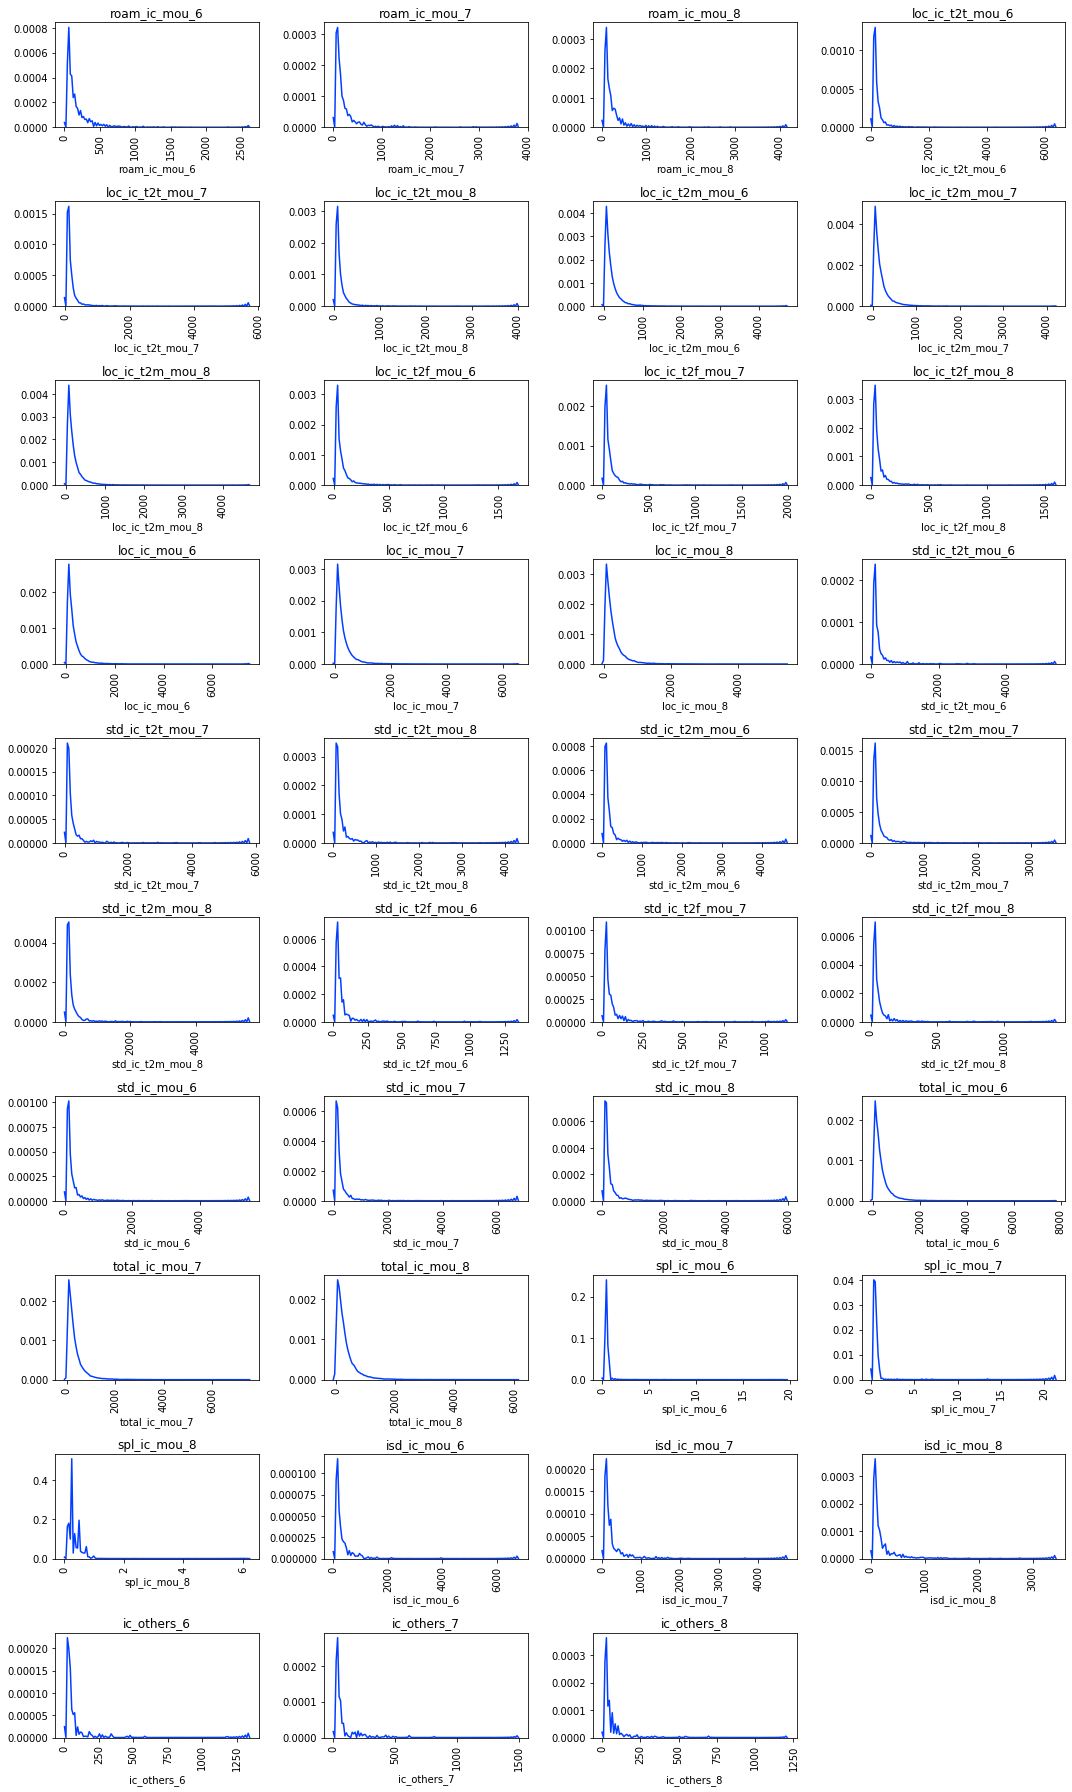

In [97]:
sns.set_palette("bright")
plt.figure(figsize = (15, 25))

for col in enumerate(ic_cols):
    plt.subplot(10, 4, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)                  

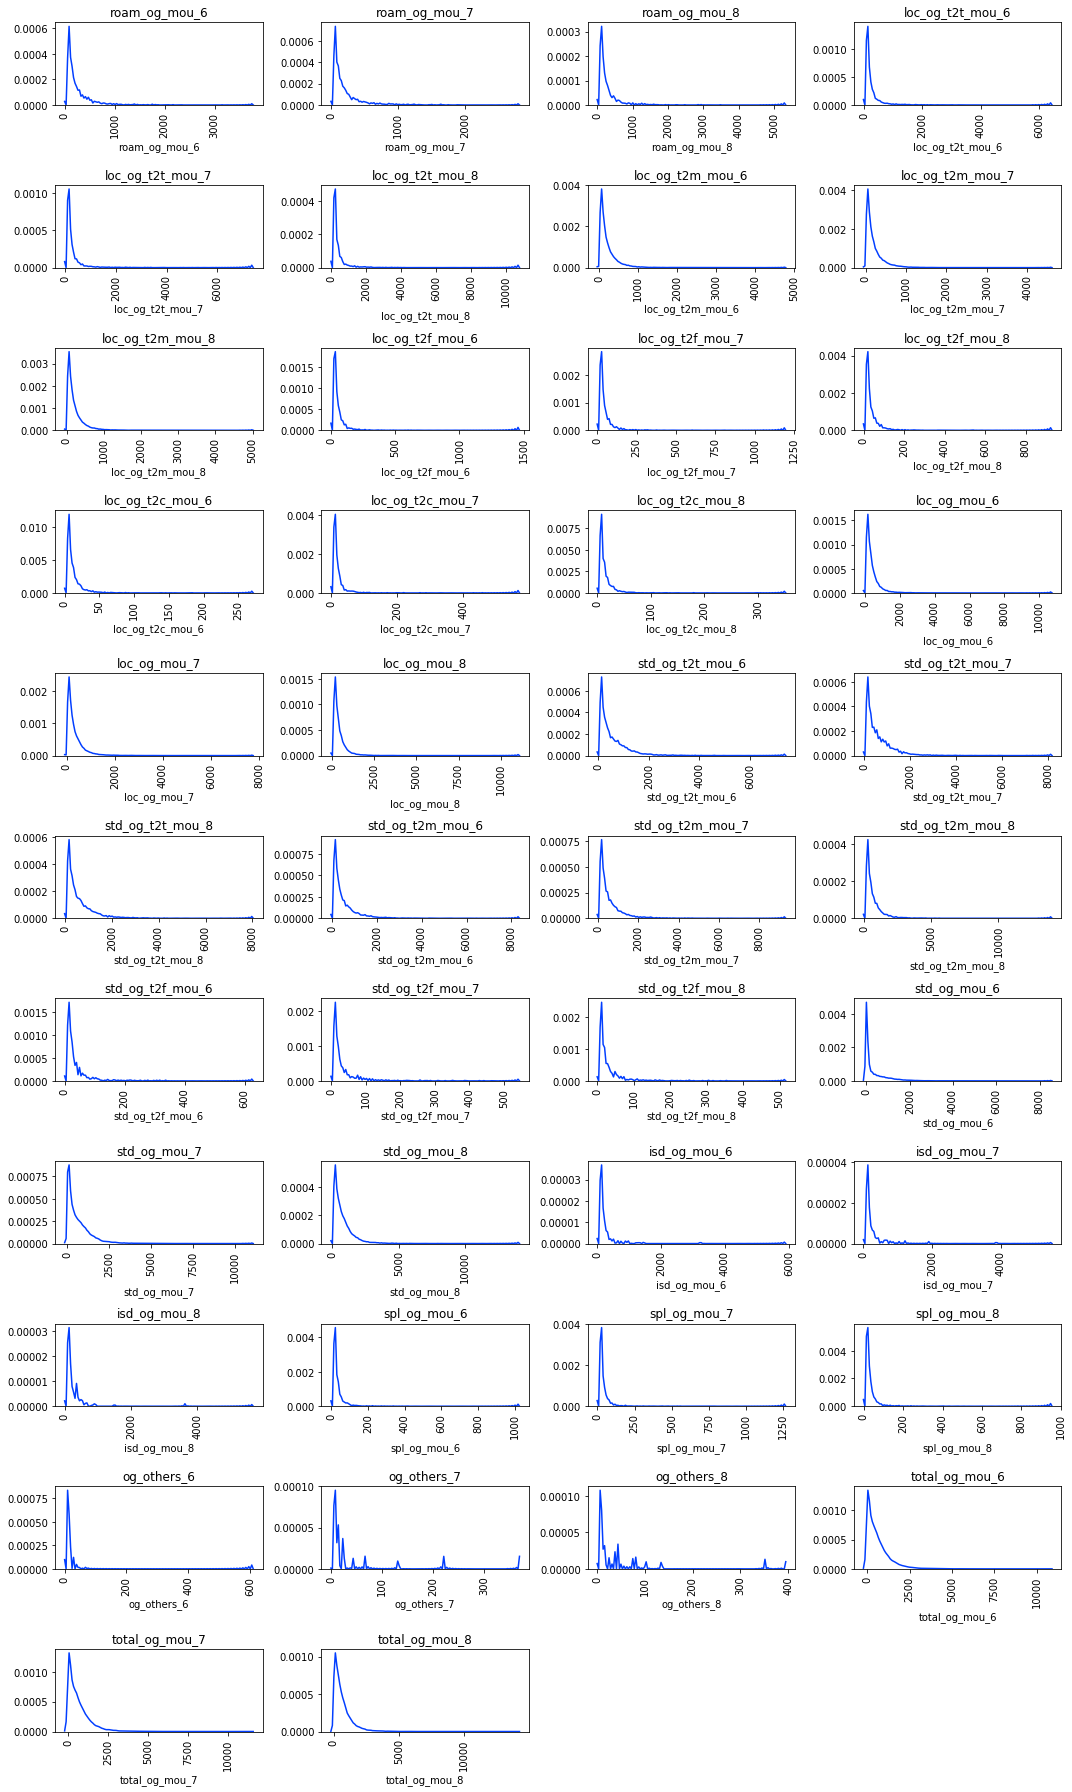

In [98]:
sns.set_palette("bright")
plt.figure(figsize = (15, 25))

for col in enumerate(og_cols):
    plt.subplot(11, 4, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)   

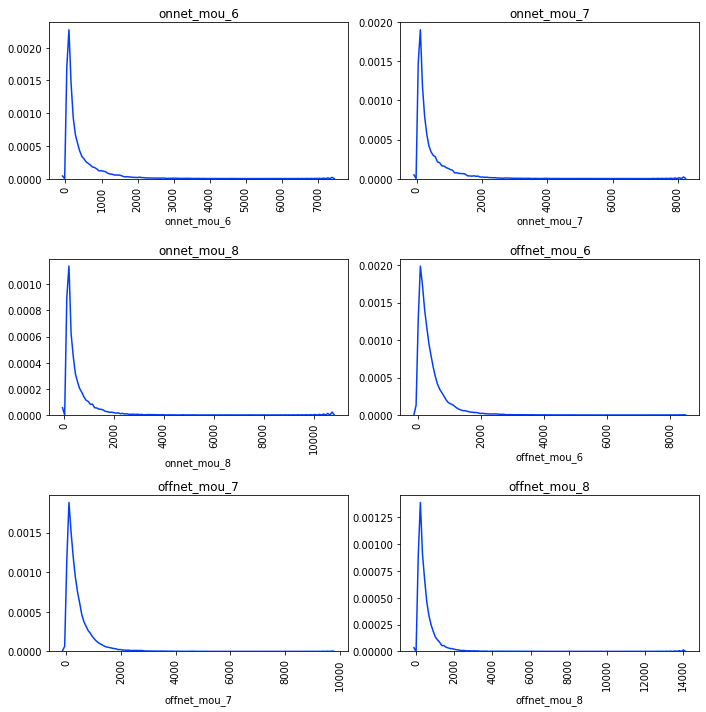

In [99]:

sns.set_palette("bright")
plt.figure(figsize = (10, 10))

for col in enumerate(onnet_offnet):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

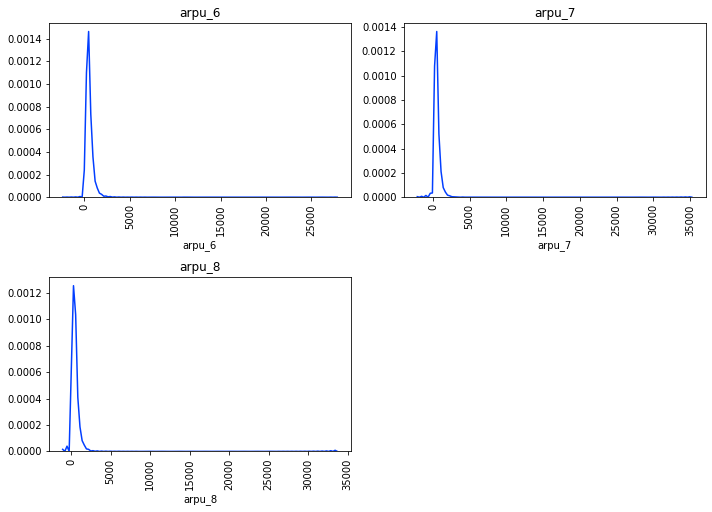

In [100]:
sns.set_palette("bright")
plt.figure(figsize = (10, 10))

for col in enumerate(arpu):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

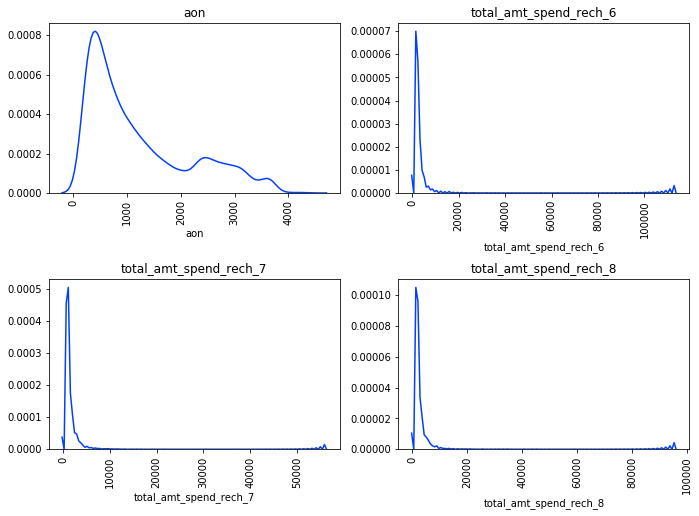

In [101]:
sns.set_palette("bright")
plt.figure(figsize = (10, 10))

for col in enumerate(imp_cols):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

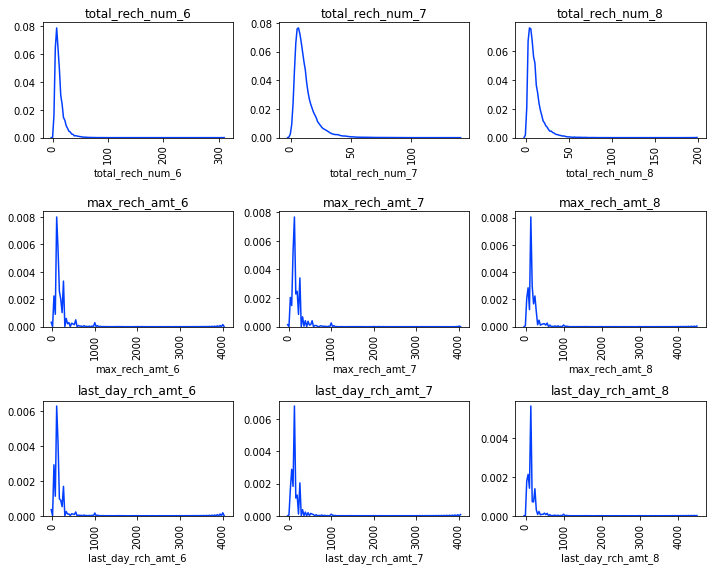

In [102]:
sns.set_palette("bright")
plt.figure(figsize = (10, 10))

for col in enumerate(other_rech_cols):
    plt.subplot(4, 3, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

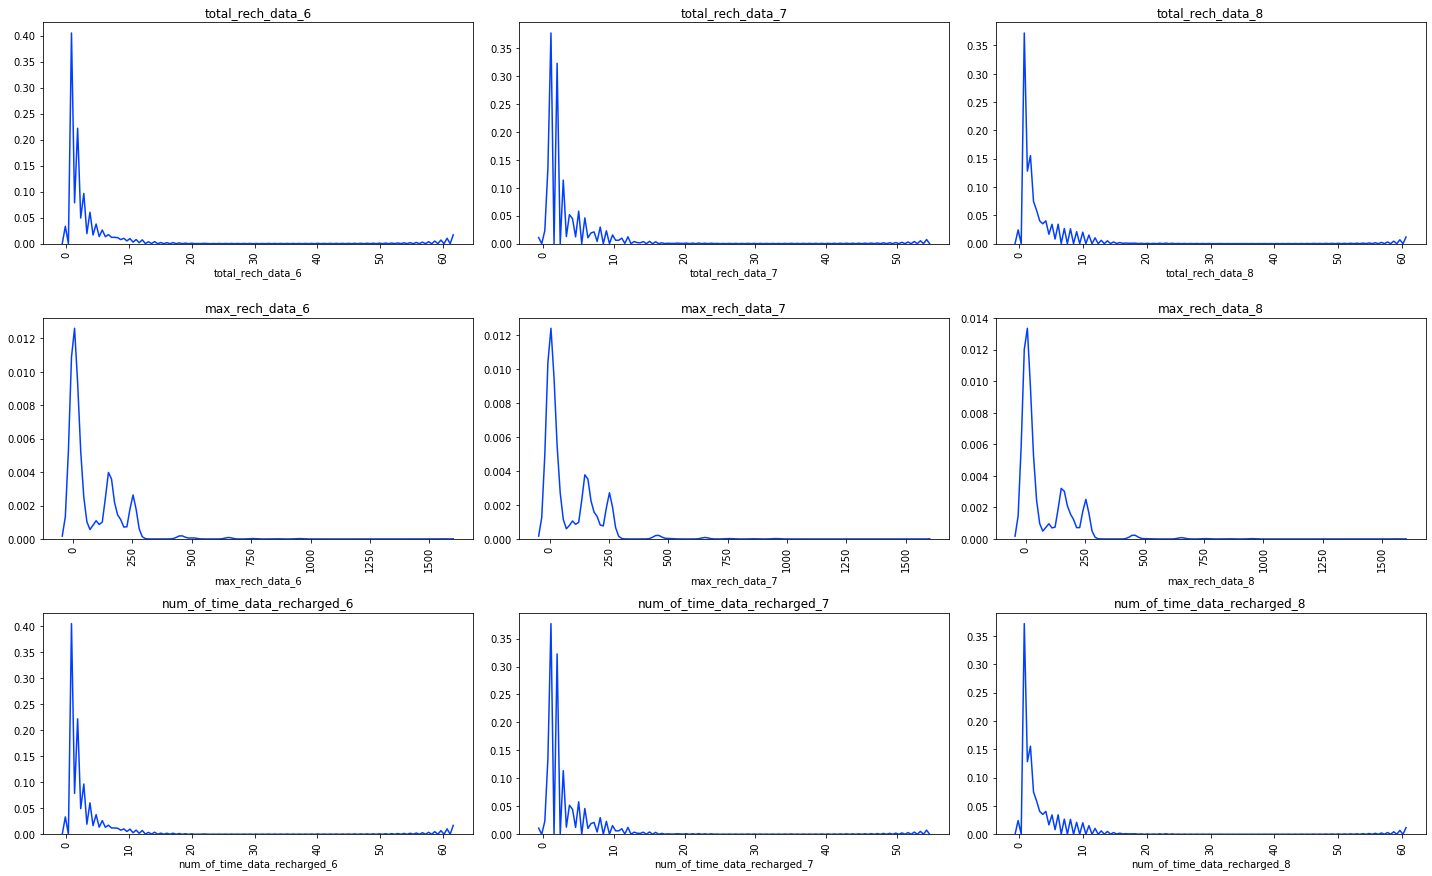

In [105]:
sns.set_palette("bright")
plt.figure(figsize = (20, 20))

for col in enumerate(primary_data_cols):
    plt.subplot(5, 3, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

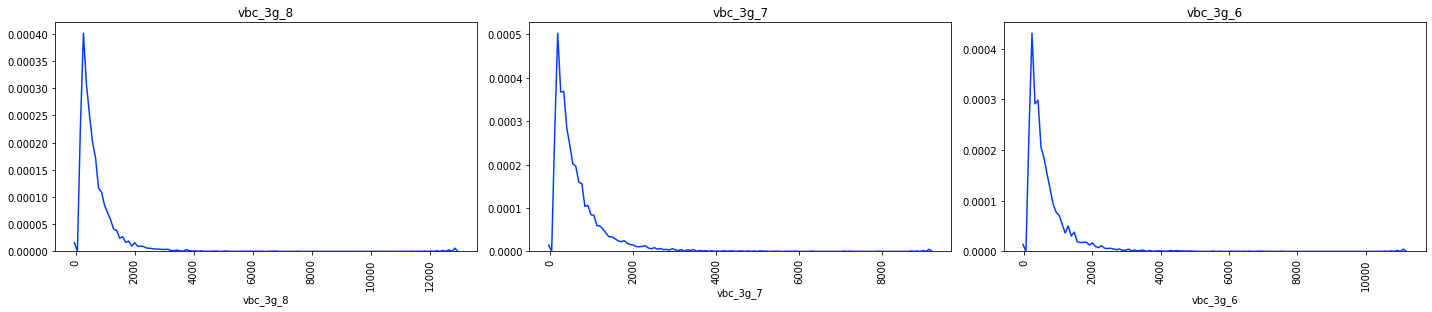

In [109]:
sns.set_palette("bright")
plt.figure(figsize = (20, 20))

for col in enumerate(secondary_data_cols):
    plt.subplot(5, 3, col[0]+1)
    plt.title(col[1])
    sns.distplot(hvc_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90) 

### ***Bi-Variate Analysis - Numerical Columns***

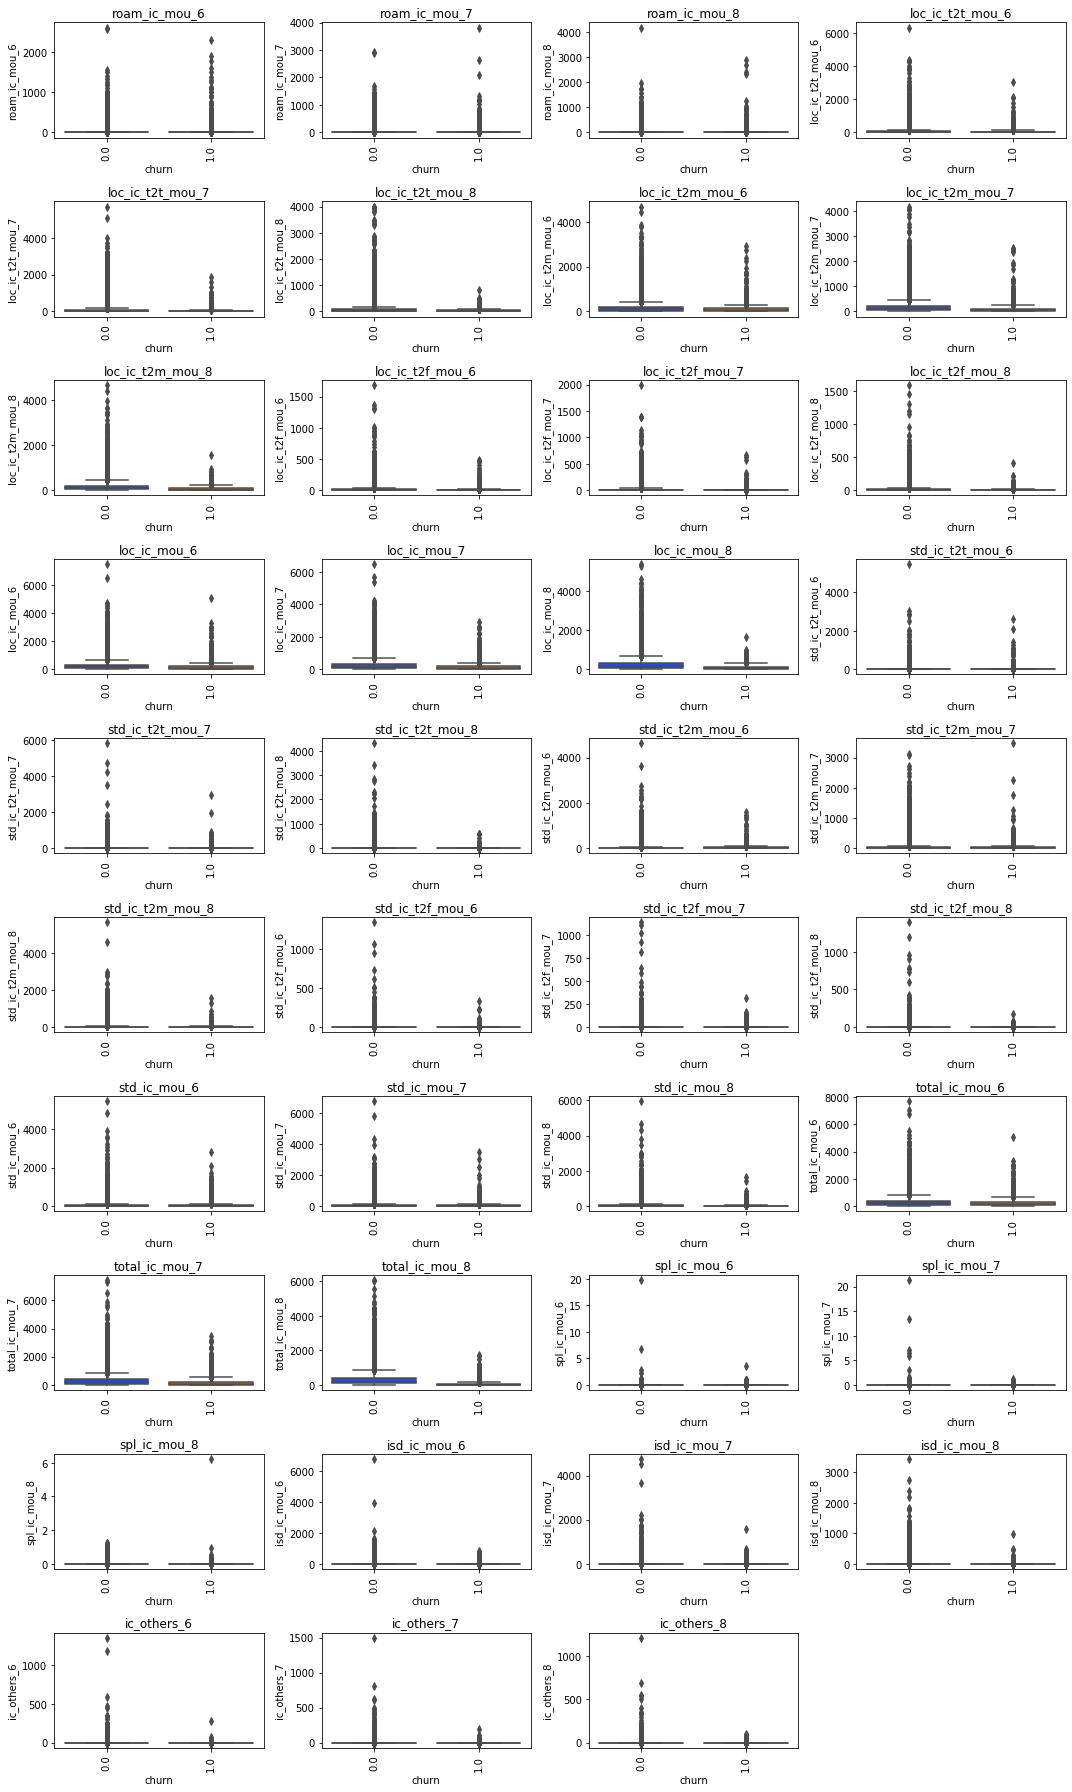

In [110]:
sns.set_palette("bright")
plt.figure(figsize = (15, 25))

for col in enumerate(ic_cols):
    plt.subplot(10, 4, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)  

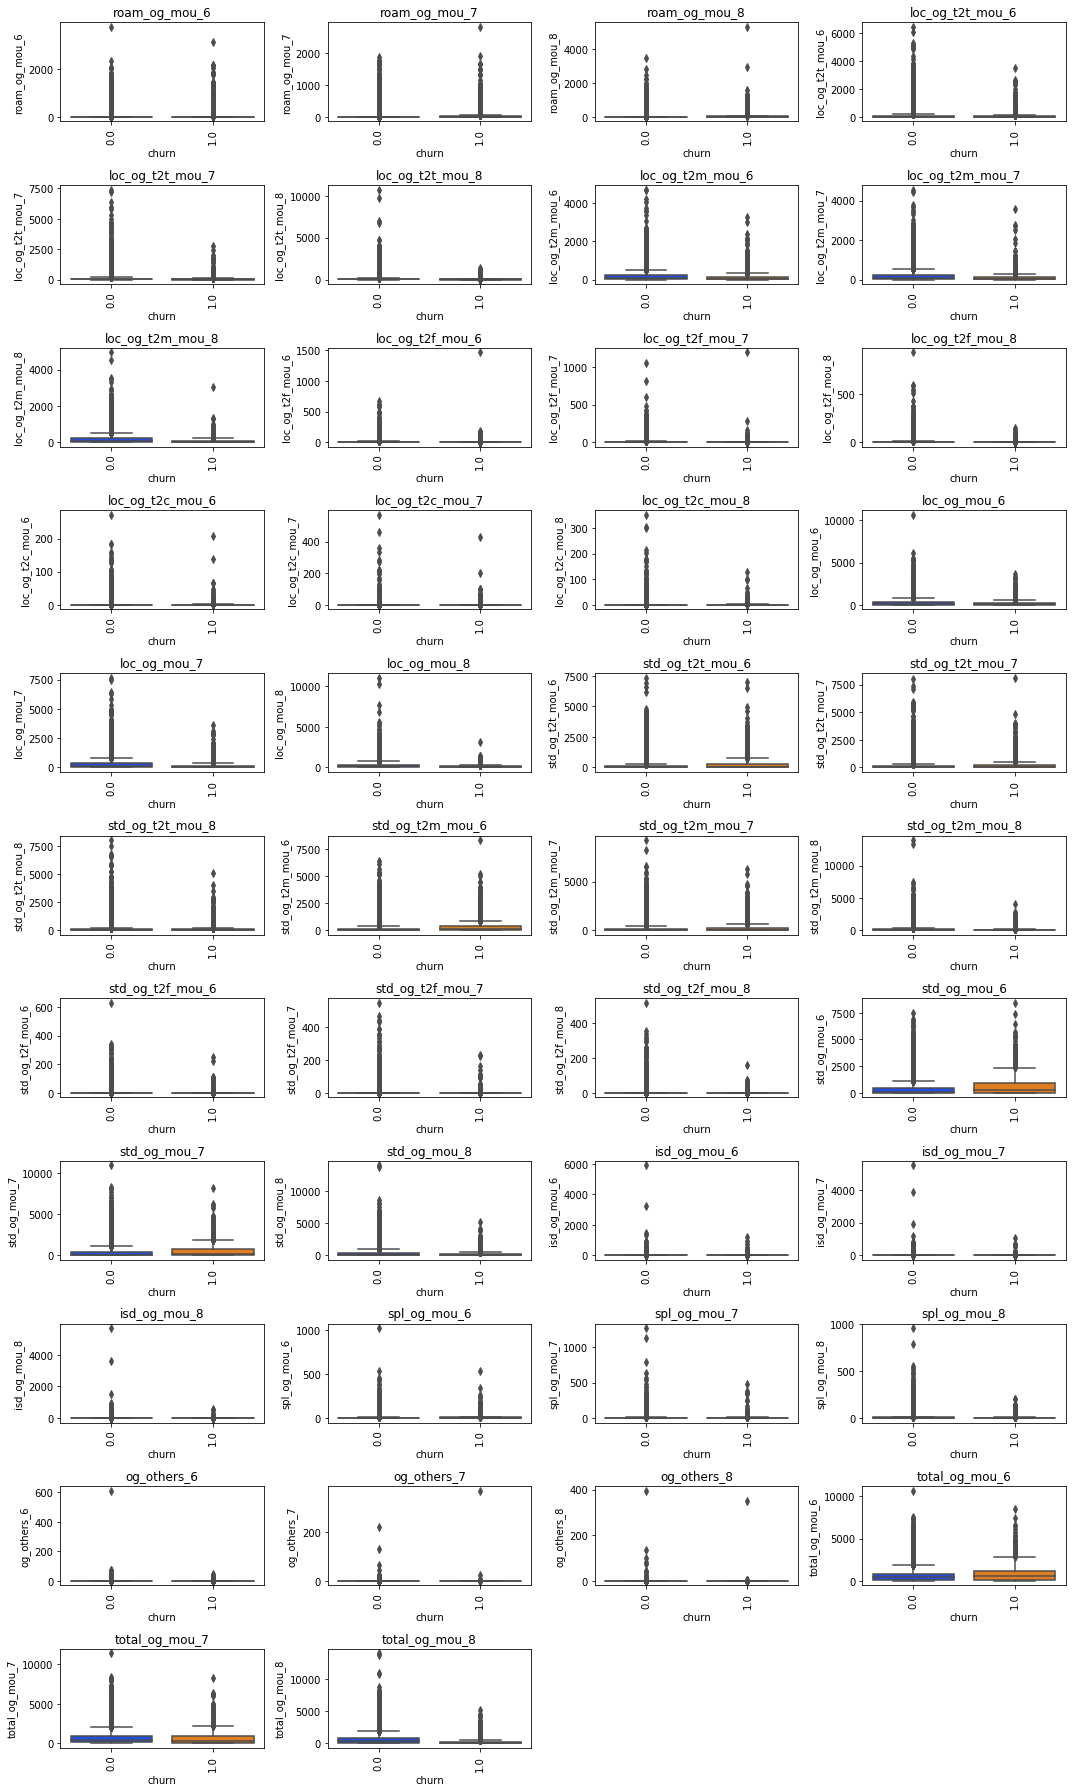

In [111]:
sns.set_palette("bright")
plt.figure(figsize = (15, 25))

for col in enumerate(og_cols):
    plt.subplot(11, 4, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)                  

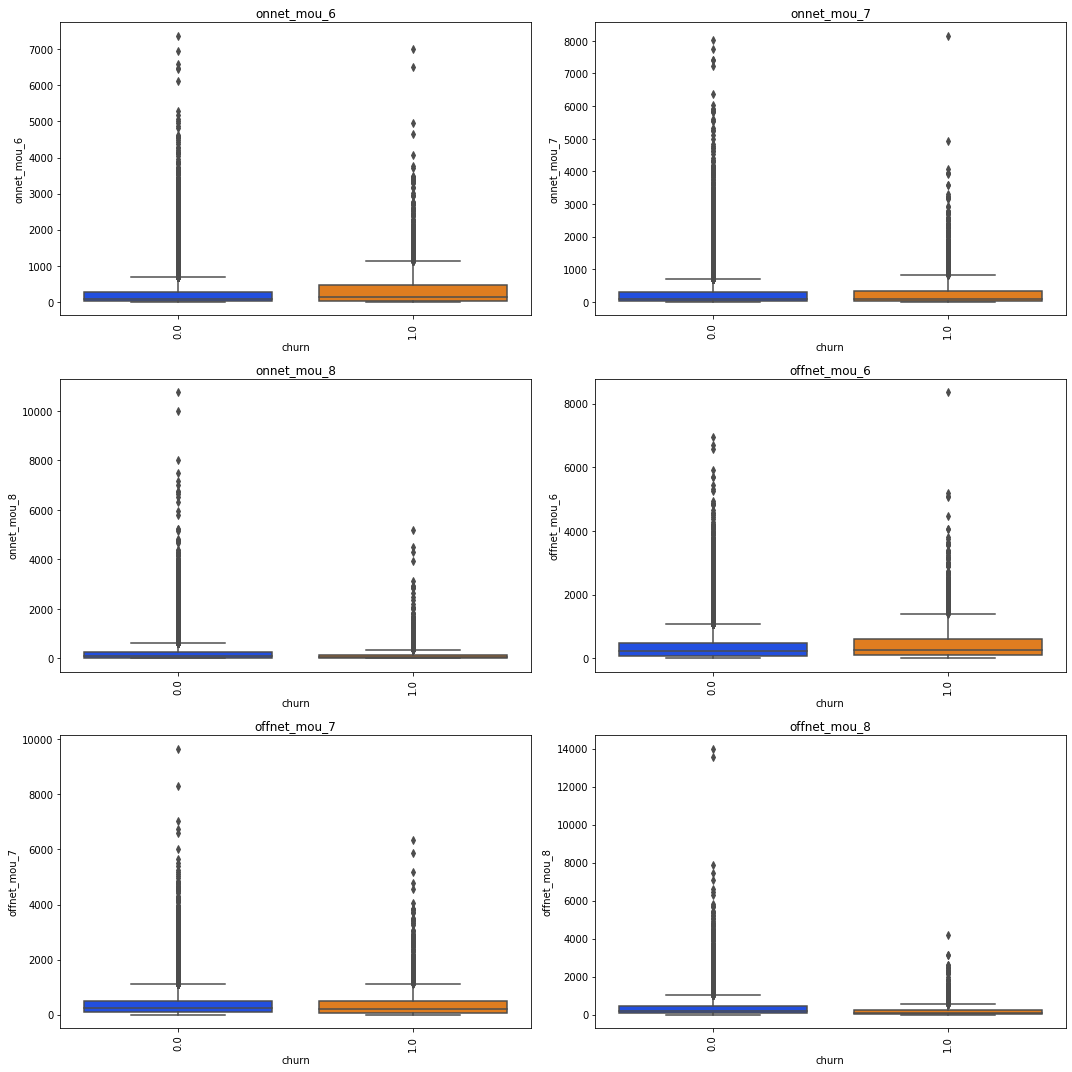

In [112]:

sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(onnet_offnet):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

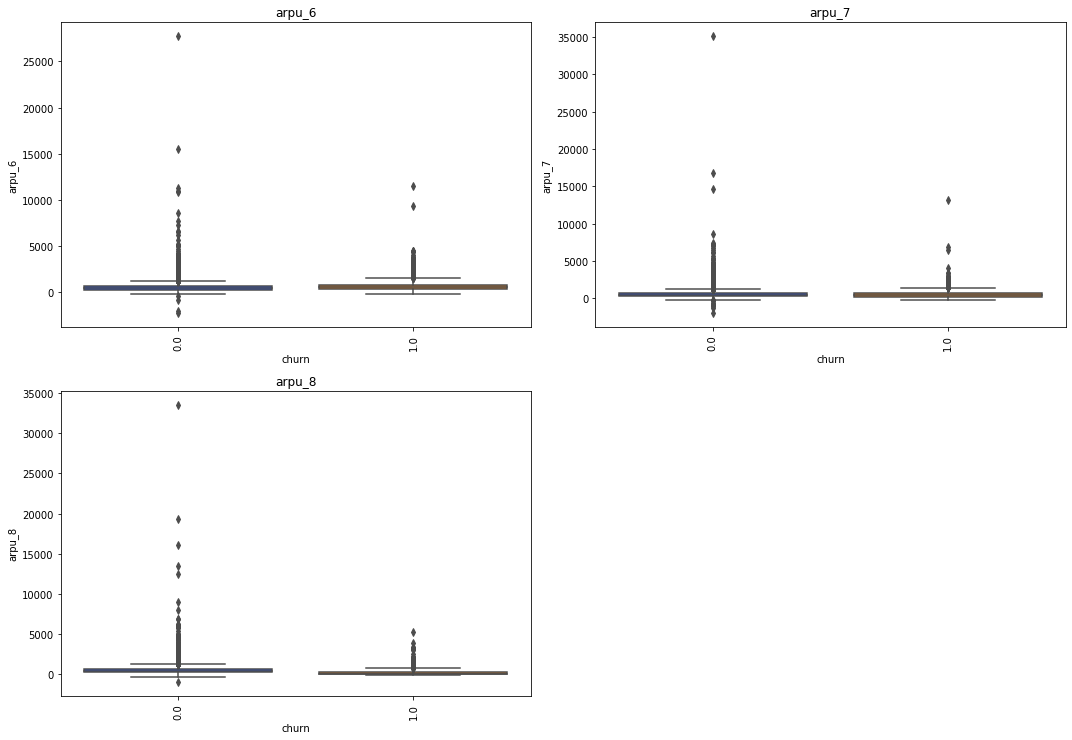

In [113]:
sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(arpu):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

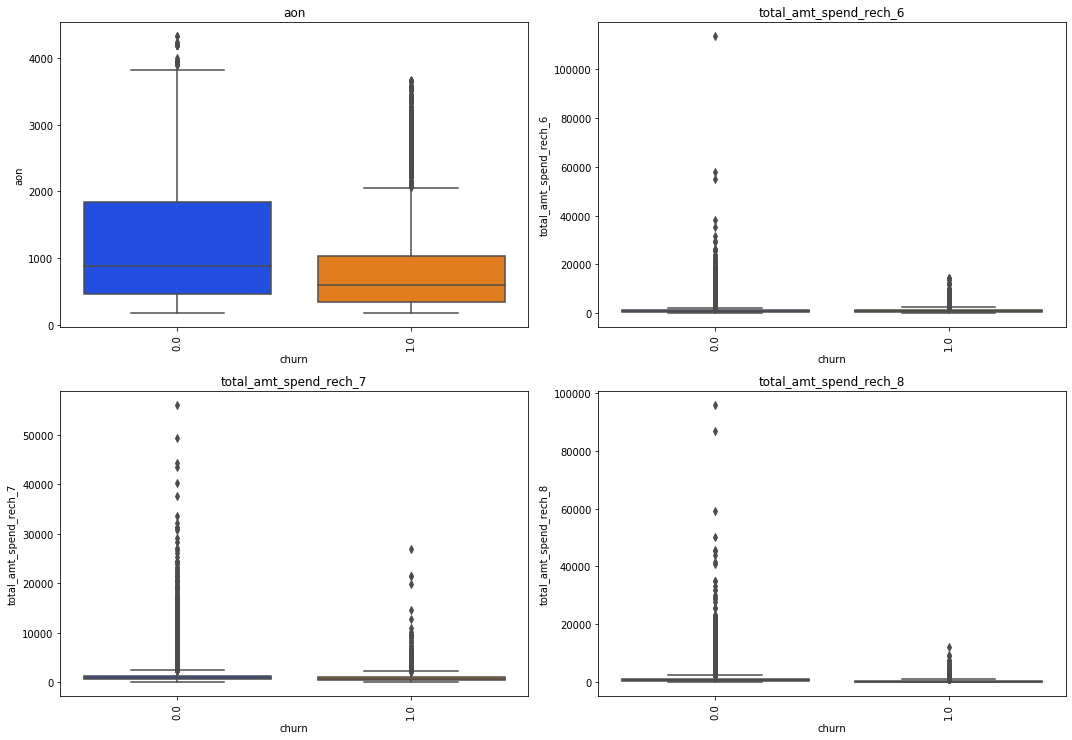

In [114]:
sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(imp_cols):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

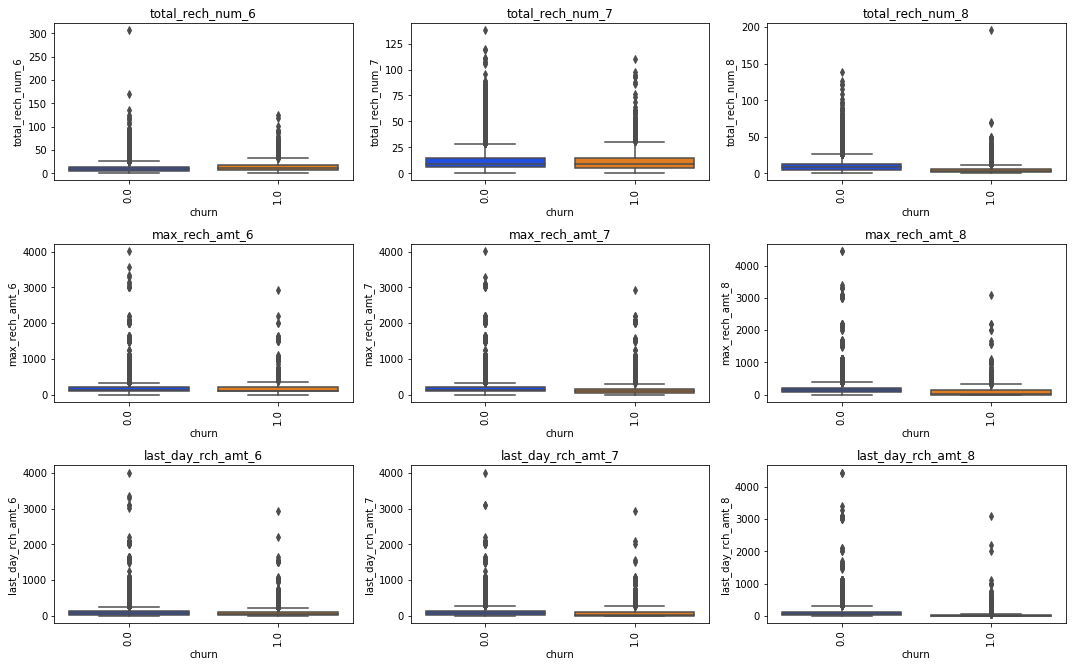

In [115]:

sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(other_rech_cols):
    plt.subplot(5, 3, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

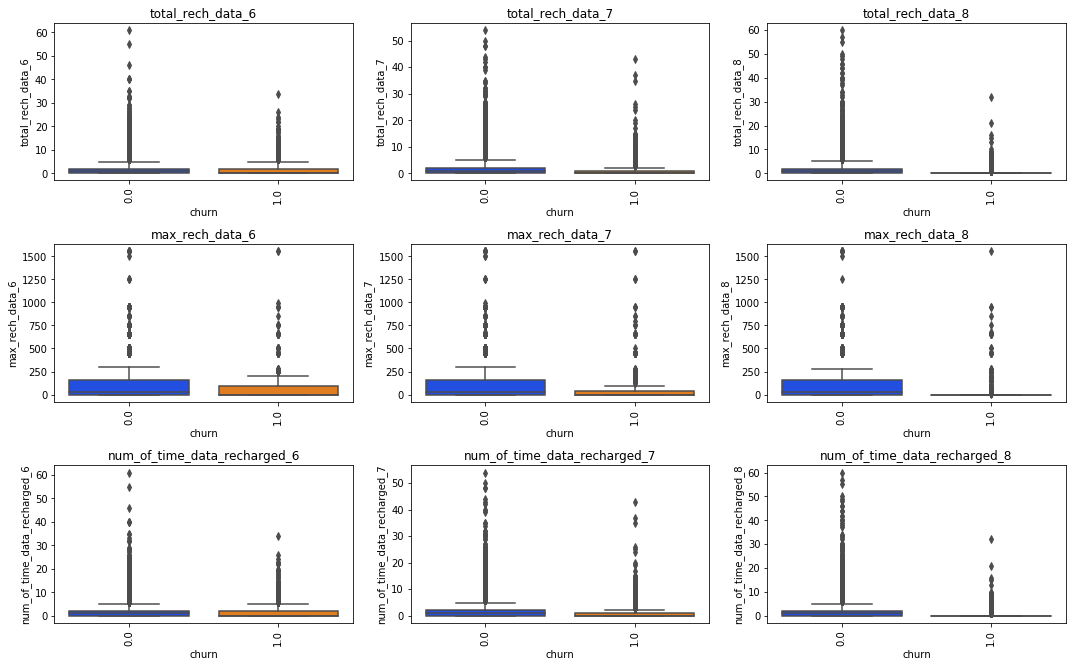

In [116]:
sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(primary_data_cols):
    plt.subplot(5, 3, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

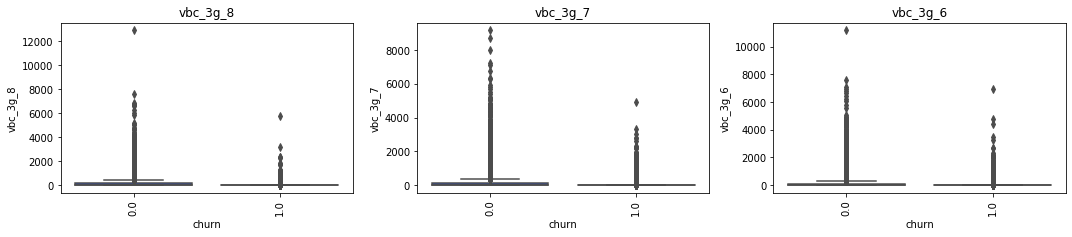

In [117]:
sns.set_palette("bright")
plt.figure(figsize = (15, 15))

for col in enumerate(secondary_data_cols):
    plt.subplot(5, 3, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(x='churn', y=col[1], data = hvc_data)
    plt.tight_layout()
    plt.xticks(rotation = 90)

### ***Univariate Analysis - Categorical Columns***

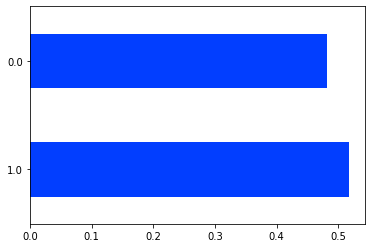

In [118]:
hvc_data.fb_user_6.value_counts(normalize=True).plot.barh()
plt.show()

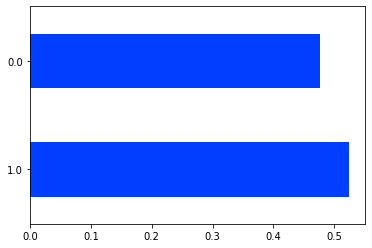

In [119]:
hvc_data.fb_user_7.value_counts(normalize=True).plot.barh()
plt.show()

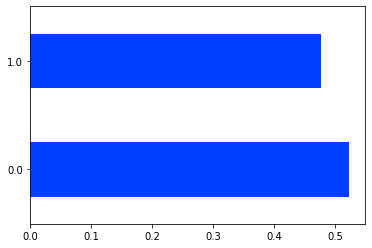

In [120]:
hvc_data.fb_user_8.value_counts(normalize=True).plot.barh()
plt.show()

### ***Bi-Variate Analysis - Categorical Columns***

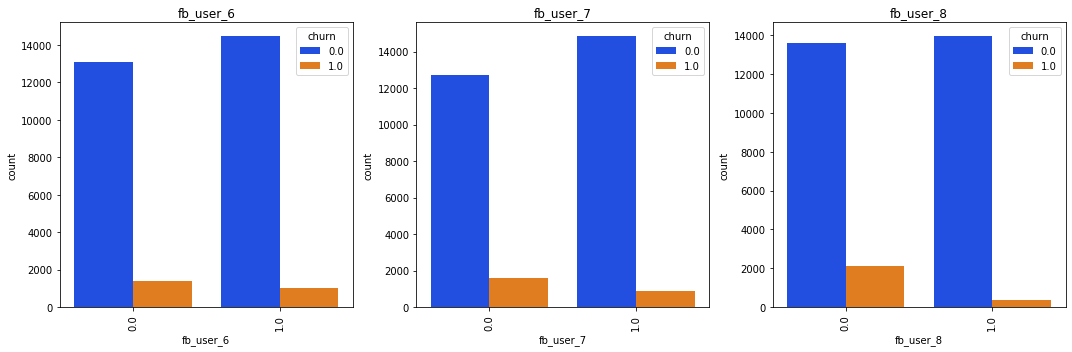

In [121]:
sns.set_palette("bright")
plt.figure(figsize = (15, 5))

for col in enumerate(categoricalcols):
    plt.subplot(1, 3, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = hvc_data, x=col[1], hue='churn') 
    plt.tight_layout()
    plt.xticks(rotation = 90)

**Quick summary from EDA:**

1. We can clearly see that our data is highly skewed.


2. From the boxplots, we can see that there are lot of outliers in data which need to be handled before model building.


3. we can see two types of patterns:
    - Few Columns with one high peak- Example: arpu_6,total_num_rech_6
    - Few columns have high fluctulations with many local maximum. Eg:Columns like spl_ic_mou_8,og_others_7,og_others_8
        
        
4. The age on network is more for non-churners than churners. 


5. The probability of churners is more for non-fb users.

        

## ***Step 8: Data Preparation***

### ***Creation of Derived Variables***

#### ***Derived Variable - Combining 2g and 3g cols as Data_cols***

- **Data Columns : Combining 2g and 3g columns as data**

In [122]:
## Derived variable.

#Creation of 2G columns and 3G columns
two_g= [cols for cols in hvc_data if '2g' in cols]
three_g= [cols for cols in hvc_data if '3g' in cols and 'vbc' not in cols]

print("2g_related_data_columns:",two_g)
print("3g_related_data_columns:",three_g)

2g_related_data_columns: ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
3g_related_data_columns: ['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


In [123]:
#Total volume of data used : Vol in 3g + Vol in 2G 
hvc_data['vol_mb_6']=hvc_data['vol_3g_mb_6']+hvc_data['vol_2g_mb_6']
hvc_data['vol_mb_7']=hvc_data['vol_3g_mb_7']+hvc_data['vol_2g_mb_7']
hvc_data['vol_mb_8']=hvc_data['vol_3g_mb_8']+hvc_data['vol_2g_mb_8']

#Total ARPU_Data = ARPU_3G  + ARPU_2G
hvc_data['arpu_data_6']=hvc_data['arpu_3g_6']+hvc_data['arpu_2g_6']
hvc_data['arpu_data_7']=hvc_data['arpu_3g_7']+hvc_data['arpu_2g_7']
hvc_data['arpu_data_8']=hvc_data['arpu_3g_8']+hvc_data['arpu_2g_8']

#Total Monthly_Scheme_Data  = Monthly_Scheme_3G  + Monthly_Scheme_2G
hvc_data['monthly_scheme_data_6']=hvc_data['monthly_3g_6']+hvc_data['monthly_2g_6']
hvc_data['monthly_scheme_data_7']=hvc_data['monthly_3g_7']+hvc_data['monthly_2g_7']
hvc_data['monthly_scheme_data_8']=hvc_data['monthly_3g_8']+hvc_data['monthly_2g_8']

#Total sachet_scheme_data_6  = Sachet_Scheme_3G  + Sachet_Scheme_2G
hvc_data['sachet_scheme_data_6']=hvc_data['sachet_3g_6']+hvc_data['sachet_2g_6']
hvc_data['sachet_scheme_data_7']=hvc_data['sachet_3g_7']+hvc_data['sachet_2g_7']
hvc_data['sachet_scheme_data_8']=hvc_data['sachet_3g_8']+hvc_data['sachet_2g_8']

In [124]:
#Checking the shape before removing the columns. 
hvc_data.shape

(30001, 175)

In [125]:
#Dropping all the previously created variables.
hvc_data.drop(two_g,axis=1,inplace=True)
hvc_data.drop(three_g,axis=1,inplace=True)

- **Delete variables that were created during filtering of HVC customers**

In [126]:
#Dropping all the previously created variables.  
hvc_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis=1,inplace=True)

In [127]:
#Checking the shape after removal of columns. 
hvc_data.shape

(30001, 142)

In [128]:
#Checking the description and statistics  after removal of columns. 
hvc_data.describe(include='all')

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,num_of_time_data_recharged_6,num_of_time_data_recharged_7,num_of_time_data_recharged_8,total_amt_spent_data_6,total_amt_spent_data_7,total_amt_spent_data_8,total_amt_spend_rech_6,total_amt_spend_rech_7,total_amt_spend_rech_8,avg_recharge_amt_6_7,churn,vol_mb_6,vol_mb_7,vol_mb_8,arpu_data_6,arpu_data_7,arpu_data_8,monthly_scheme_data_6,monthly_scheme_data_7,monthly_scheme_data_8,sachet_scheme_data_6,sachet_scheme_data_7,sachet_scheme_data_8
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,

#### ***Date related columns:***

In [129]:
#Creating a list of Date related columns 
date_related_cols=['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

#Dropping all the unnecessary columns
hvc_data.drop(date_related_cols,inplace=True,axis=1)

#### ***Features that can be explained from other features.***

In [130]:
#LOC + STD + ISD + SPL = > TOTAL INCOMING
print(hvc_data.loc[11,'total_ic_mou_6'],"==",hvc_data.loc[11,['loc_ic_mou_6','roam_ic_mou_6','isd_ic_mou_6','spl_ic_mou_6','std_ic_mou_6']].sum())
print(hvc_data.loc[11,'loc_ic_mou_6'],"==",hvc_data.loc[11,['loc_ic_t2t_mou_6','loc_ic_t2m_mou_6','loc_ic_t2f_mou_6']].sum())
print(hvc_data.loc[11,'std_ic_mou_6'],"==",hvc_data.loc[11,['std_ic_t2t_mou_6','std_ic_t2m_mou_6','std_ic_t2f_mou_6']].sum())


print(hvc_data.loc[11,'total_ic_mou_7'],"==",hvc_data.loc[11,['loc_ic_mou_7','roam_ic_mou_7','isd_ic_mou_7','spl_ic_mou_7','std_ic_mou_7']].sum())
print(hvc_data.loc[11,'loc_ic_mou_7'],"==",hvc_data.loc[11,['loc_ic_t2t_mou_7','loc_ic_t2m_mou_7','loc_ic_t2f_mou_7']].sum())
print(hvc_data.loc[11,'std_ic_mou_7'],"==",hvc_data.loc[11,['std_ic_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2f_mou_7']].sum())


print(hvc_data.loc[11,'total_ic_mou_8'],"==",hvc_data.loc[11,['loc_ic_mou_8','roam_ic_mou_8','isd_ic_mou_8','spl_ic_mou_8','std_ic_mou_8']].sum())
print(hvc_data.loc[11,'loc_ic_mou_8'],"==",hvc_data.loc[11,['loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8']].sum())
print(hvc_data.loc[11,'std_ic_mou_8'],"==",hvc_data.loc[11,['std_ic_t2t_mou_8','std_ic_t2m_mou_8','std_ic_t2f_mou_8']].sum())


367.36 == 367.35
320.51 == 320.5
46.84 == 46.84
450.63 == 450.62
447.81 == 447.79
2.81 == 2.8099999999999996
433.71 == 433.7
403.96 == 403.94
29.26 == 29.259999999999998


In [131]:
#Getting the list of all columns where we handling incoming calls data
list_total_ic_cols = hvc_data.columns[hvc_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

In [132]:
#Dropping the list of all columns where we handling incoming calls data
hvc_data.drop(list_total_ic_cols,axis=1,inplace=True)

#### ***Highly multicollinear columns created during prediction of churn***

In [133]:
#List of variables that got created during churn prediction
multicollinear_cols_drop=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
          'total_amt_spent_data_6','total_amt_spent_data_7','total_amt_spent_data_8','avg_recharge_amt_6_7']

#Dropping all the extra variables
hvc_data.drop(multicollinear_cols_drop,axis=1,inplace=True)

In [134]:
#Checking the shape after removing all the cols
hvc_data.shape

(30001, 123)

#### ***Creating GoodPhase columns***

- *Here we introduce columns known as GoodPhase Columns -> provide the mean of 6th and 7th column.*

- *We also create one more variable where we find the difference between GoodPhase and action phase columns.*

- *Once the columns are created, we drop the previous columns.*

In [135]:
#Good phase for arpu column
hvc_data['arpu_GoodPhase'] = ((hvc_data.arpu_6 + hvc_data.arpu_7)/2)
hvc_data['arpu_diff'] = hvc_data.arpu_8 - hvc_data.arpu_GoodPhase

#Good phase for Onnet column
hvc_data['onnet_GoodPhase'] = ((hvc_data.onnet_mou_6 + hvc_data.onnet_mou_7)/2)
hvc_data['onnet_mou_diff'] = hvc_data.onnet_mou_8 - hvc_data.onnet_GoodPhase

#Good phase for Offnet column
hvc_data['offnet_GoodPhase'] = ((hvc_data.offnet_mou_6 + hvc_data.offnet_mou_7)/2)
hvc_data['offnet_mou_diff'] = hvc_data.offnet_mou_8 - hvc_data.offnet_GoodPhase

#Good phase for Roaming Incoming column
hvc_data['roam_ic_mou_GoodPhase'] = ((hvc_data.roam_ic_mou_6 + hvc_data.roam_ic_mou_7)/2)
hvc_data['roam_ic_mou_diff'] = hvc_data.roam_ic_mou_8 - hvc_data.roam_ic_mou_GoodPhase

#Good phase for Roaming outgoing column
hvc_data['roam_og_mou_GoodPhase'] = ((hvc_data.roam_og_mou_6 + hvc_data.roam_og_mou_7)/2)
hvc_data['roam_og_mou_diff'] = hvc_data.roam_og_mou_8 - hvc_data.roam_ic_mou_GoodPhase

#Good phase for Local outgoing column
hvc_data['loc_og_mou_GoodPhase'] = ((hvc_data.loc_og_mou_6 + hvc_data.loc_og_mou_7)/2)
hvc_data['loc_og_mou_diff'] = hvc_data.loc_og_mou_8 - hvc_data.loc_og_mou_GoodPhase

#Good phase for Standard outgoing column
hvc_data['std_og_mou_GoodPhase'] = ((hvc_data.std_og_mou_6 + hvc_data.std_og_mou_7)/2)
hvc_data['std_og_mou_diff'] = hvc_data.std_og_mou_8 - hvc_data.std_og_mou_GoodPhase

#Good phase for International outgoing column
hvc_data['isd_og_mou_GoodPhase'] = ((hvc_data.isd_og_mou_6 + hvc_data.isd_og_mou_7)/2)
hvc_data['isd_og_mou_diff'] = hvc_data.isd_og_mou_8 - hvc_data.isd_og_mou_GoodPhase

#Good phase for Special outgoing column
hvc_data['spl_og_mou_GoodPhase'] = ((hvc_data.spl_og_mou_6 + hvc_data.spl_og_mou_7)/2)
hvc_data['spl_og_mou_diff'] = hvc_data.spl_og_mou_8 -  hvc_data.spl_og_mou_GoodPhase

#Good phase for Total outgoing column
hvc_data['total_og_mou_GoodPhase'] = ((hvc_data.total_og_mou_6 + hvc_data.total_og_mou_7)/2)
hvc_data['total_og_mou_diff'] = hvc_data.total_og_mou_8 - hvc_data.total_og_mou_GoodPhase

#Good phase for International Incoming  column
hvc_data['isd_ic_mou_GoodPhase'] = ((hvc_data.isd_ic_mou_6 + hvc_data.isd_ic_mou_7)/2)
hvc_data['isd_ic_mou_diff'] = hvc_data.isd_ic_mou_8 - hvc_data.isd_ic_mou_GoodPhase

#Good phase for Special incoming column
hvc_data['spl_ic_mou_GoodPhase'] = ((hvc_data.spl_ic_mou_6 + hvc_data.spl_ic_mou_7)/2)
hvc_data['spl_ic_mou_diff'] = hvc_data.spl_ic_mou_8 - hvc_data.spl_ic_mou_GoodPhase

#Good phase for Total Recharge
hvc_data['total_rech_num_GoodPhase'] = ((hvc_data.total_rech_num_6 + hvc_data.total_rech_num_7)/2) 
hvc_data['total_rech_num_diff'] = hvc_data.total_rech_num_8 - hvc_data.total_rech_num_GoodPhase

#Good phase for Max Recharge amount
hvc_data['max_rech_amt_GoodPhase'] = ((hvc_data.max_rech_amt_6 + hvc_data.max_rech_amt_7)/2)
hvc_data['max_rech_amt_diff'] = hvc_data.max_rech_amt_8 - hvc_data.max_rech_amt_GoodPhase 

#Good phase for Total Recharge data 
hvc_data['total_rech_data_GoodPhase'] = ((hvc_data.total_rech_data_6 + hvc_data.total_rech_data_7)/2)
hvc_data['total_rech_data_diff'] = hvc_data.total_rech_data_8 - hvc_data.total_rech_data_GoodPhase

#Good phase for Max Recharge data
hvc_data['max_rech_data_GoodPhase'] = ((hvc_data.max_rech_data_6 + hvc_data.max_rech_data_7)/2)
hvc_data['max_rech_data_diff'] = hvc_data.max_rech_data_8 - hvc_data.max_rech_data_GoodPhase

#Good phase for ARPU_Data 
hvc_data['arpu_data_GoodPhase'] = ((hvc_data.arpu_data_6 + hvc_data.arpu_data_7)/2)
hvc_data['arpu_diff'] = hvc_data.arpu_data_8 - hvc_data.arpu_data_GoodPhase 

#Good phase for Total Amount spent
hvc_data['total_amt_spend_rech_GoodPhase'] = ((hvc_data.total_amt_spend_rech_6 + hvc_data.total_amt_spend_rech_7)/2)
hvc_data['total_amt_spend_rech_diff'] = hvc_data.total_amt_spend_rech_8 - hvc_data.total_amt_spend_rech_GoodPhase

#Good phase for Local Outgoing -T2C
hvc_data['loc_og_t2c_mou_GoodPhase']=((hvc_data.loc_og_t2c_mou_6+hvc_data.loc_og_t2c_mou_7)/2)
hvc_data['loc_og_t2c_mou_diff']=hvc_data.loc_og_t2c_mou_8 - hvc_data.loc_og_t2c_mou_GoodPhase

#Good phase for Standard Outgoing -T2M
hvc_data['std_og_t2m_mou_GoodPhase']=((hvc_data.std_og_t2m_mou_6+hvc_data.std_og_t2m_mou_7)/2)
hvc_data['std_og_t2m_mou_diff']=hvc_data.std_og_t2m_mou_8 - hvc_data.loc_og_t2c_mou_GoodPhase

#Good phase for Standard Outgoing - T2F
hvc_data['std_og_t2f_mou_GoodPhase']=((hvc_data.std_og_t2f_mou_6+hvc_data.std_og_t2f_mou_7)/2)
hvc_data['std_og_t2f_mou_diff']=hvc_data.std_og_t2f_mou_8 - hvc_data.std_og_t2f_mou_GoodPhase

#Good phase for Outgoing - Others
hvc_data['og_others_GoodPhase']=((hvc_data.og_others_6 + hvc_data.og_others_7)/2)
hvc_data['og_others_diff']=hvc_data.og_others_8 - hvc_data.og_others_GoodPhase

#Good phase for Local Incoming - T2F 
hvc_data['loc_ic_t2f_mou_GoodPhase']=((hvc_data.loc_ic_t2f_mou_6 + hvc_data.loc_ic_t2f_mou_7)/2)
hvc_data['loc_ic_t2f_mou_diff']=hvc_data.loc_ic_t2f_mou_8 - hvc_data.loc_ic_t2f_mou_GoodPhase

#Good phase for Standard Incoming - T2T
hvc_data['std_ic_t2t_mou_GoodPhase']=((hvc_data.std_ic_t2t_mou_6 + hvc_data.std_ic_t2t_mou_7)/2)
hvc_data['std_ic_t2t_mou_diff']=hvc_data.std_ic_t2t_mou_8 - hvc_data.std_ic_t2t_mou_GoodPhase

#Good phase for Standard Incoming - T2M
hvc_data['std_ic_t2m_mou_GoodPhase']=((hvc_data.std_ic_t2m_mou_6 + hvc_data.std_ic_t2m_mou_7)/2)
hvc_data['std_ic_t2m_mou_diff']=hvc_data.std_ic_t2m_mou_8 - hvc_data.std_ic_t2m_mou_GoodPhase

#Good phase for Standard Incoming - T2F
hvc_data['std_ic_t2f_mou_GoodPhase']=((hvc_data.std_ic_t2f_mou_6 + hvc_data.std_ic_t2f_mou_7)/2)
hvc_data['std_ic_t2f_mou_diff']=hvc_data.std_ic_t2f_mou_8 - hvc_data.std_ic_t2f_mou_GoodPhase

#Good phase for Incoming - Others
hvc_data['ic_others_GoodPhase']=((hvc_data.ic_others_6 + hvc_data.ic_others_7)/2)
hvc_data['ic_others_diff']=hvc_data.ic_others_8 - hvc_data.ic_others_GoodPhase

#Good phase for Number of times data was recharged. 
hvc_data['num_of_time_data_recharged_GoodPhase']=((hvc_data.num_of_time_data_recharged_6 + hvc_data.num_of_time_data_recharged_7)/2)
hvc_data['num_of_time_data_recharged_diff']=hvc_data.num_of_time_data_recharged_8 - hvc_data.num_of_time_data_recharged_GoodPhase

#Good phase for Volume of Data used
hvc_data['vol_mb_GoodPhase']=((hvc_data.vol_mb_6 + hvc_data.vol_mb_7)/2)
hvc_data['vol_mb_diff']=hvc_data.vol_mb_8 - hvc_data.vol_mb_GoodPhase

#Good phase for Volume of 3G data used
hvc_data['vbc_3g_GoodPhase']=((hvc_data.vbc_3g_6 + hvc_data.vbc_3g_7)/2)
hvc_data['vbc_3g_diff']=hvc_data.vbc_3g_8 - hvc_data.vbc_3g_GoodPhase

#Good phase for amount recharged on the last day. 
hvc_data['last_day_rch_amt_GoodPhase']=((hvc_data.last_day_rch_amt_6 + hvc_data.last_day_rch_amt_7)/2)
hvc_data['last_day_rch_amt_diff']=hvc_data.last_day_rch_amt_8 - hvc_data.last_day_rch_amt_GoodPhase

#Good phase for Monthly scheme
hvc_data['monthly_scheme_data_GoodPhase']=((hvc_data.monthly_scheme_data_6 + hvc_data.monthly_scheme_data_7)/2)
hvc_data['monthly_scheme_data_diff']=hvc_data.monthly_scheme_data_8 - hvc_data.monthly_scheme_data_GoodPhase

In [136]:
#Here we only create for GoodPhase and dont find the difference  as the others have been dropped previously. 
hvc_data['loc_og_t2t_mou_GoodPhase']=(hvc_data.loc_og_t2t_mou_6+hvc_data.loc_og_t2t_mou_7)/2
hvc_data['loc_og_t2m_mou_GoodPhase']=(hvc_data.loc_og_t2m_mou_6+hvc_data.loc_og_t2m_mou_7)/2
hvc_data['std_og_t2t_mou_GoodPhase']=(hvc_data.std_og_t2t_mou_6+hvc_data.std_og_t2t_mou_7)/2
hvc_data['loc_ic_t2m_mou_GoodPhase']=(hvc_data.loc_ic_t2m_mou_6+hvc_data.loc_ic_t2m_mou_7)/2

In [137]:
#Ignoring all the other cols that end with _6 in the data. 
not_to_drop_col=['loc_ic_t2t_mou_6','loc_og_t2f_mou_6','loc_og_t2f_mou_8','fb_user_6','fb_user_7','fb_user_8']

cols_to_drop=[col for col in hvc_data.columns if col not in not_to_drop_col]

#Creating list for the columns that needs to be dropped. 
cols_6=[col for col in cols_to_drop if '_6' in col]
cols_7=[col for col in cols_to_drop if '_7' in col]
cols_8=[col for col in cols_to_drop if '_8' in col]

In [138]:
print(cols_6)
print(cols_7)
print(cols_8)

['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'vbc_3g_6', 'num_of_time_data_recharged_6', 'total_amt_spend_rech_6', 'vol_mb_6', 'arpu_data_6', 'monthly_scheme_data_6', 'sachet_scheme_data_6']
['arpu_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', '

In [139]:
#Dropping the required columns
hvc_data.drop(cols_6,inplace=True,axis=1)
hvc_data.drop(cols_7,inplace=True,axis=1)
hvc_data.drop(cols_8,inplace=True,axis=1)

In [140]:
#Checking the shape of the data after dropping. 
hvc_data.shape

(30001, 76)

#### ***Correlation Matrix and finding multicollinearity***

In [141]:
#Finding the co-relation matrix
cor_matrix = hvc_data.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                      mobile_number  loc_og_t2f_mou_6  \
mobile_number                              1.000000          0.051710   
loc_og_t2f_mou_6                           0.051710          1.000000   
loc_og_t2f_mou_8                           0.056094          0.670917   
loc_ic_t2t_mou_6                           0.033024          0.047777   
fb_user_6                                  0.022481          0.032950   
fb_user_7                                  0.025373          0.038627   
fb_user_8                                  0.013310          0.023250   
aon                                        0.315694          0.155809   
churn                                      0.030100          0.034019   
arpu_GoodPhase                             0.034644          0.136222   
arpu_diff                                  0.008793          0.003764   
onnet_GoodPhase                            0.008273          0.037856   
onnet_mou_diff                             0.000364

In [142]:
#Dropping all the columns that have a co-realtion effiecient greater that 80%
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['total_og_mou_GoodPhase', 'total_og_mou_diff', 'std_og_t2m_mou_GoodPhase', 'num_of_time_data_recharged_GoodPhase', 'num_of_time_data_recharged_diff', 'std_og_t2t_mou_GoodPhase']


In [143]:
#Finding the negative correlation pairs. 
corr_pairs = cor_matrix.unstack()
print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

mobile_number             mobile_number               1.000000
                          loc_og_t2f_mou_6            0.051710
                          loc_og_t2f_mou_8            0.056094
                          loc_ic_t2t_mou_6            0.033024
                          fb_user_6                   0.022481
                                                        ...   
loc_ic_t2m_mou_GoodPhase  monthly_scheme_data_diff    0.026220
                          loc_og_t2t_mou_GoodPhase    0.133061
                          loc_og_t2m_mou_GoodPhase    0.520880
                          std_og_t2t_mou_GoodPhase    0.123903
                          loc_ic_t2m_mou_GoodPhase    1.000000
Length: 5776, dtype: float64
spl_ic_mou_diff                 total_amt_spend_rech_GoodPhase    0.000029
total_amt_spend_rech_GoodPhase  spl_ic_mou_diff                   0.000029
total_amt_spend_rech_diff       std_og_t2f_mou_GoodPhase          0.000034
std_og_t2f_mou_GoodPhase        total_amt_spend_rech_

In [144]:
#Droping all the columns that are not required
hvc_data.drop(to_drop,inplace=True,axis=1)

In [145]:
#Inspection of shape after dropping the variables. 
hvc_data.shape

(30001, 70)

### ***Outlier Treatment***

In [146]:
#Copying the data into another Dataframe
hvc=hvc_data.copy()

In [147]:
#Importing the required libraries to divide the data into test data and training data.
from sklearn.model_selection import train_test_split
#Adding all feature columns to X Variable
X = hvc_data.drop(['mobile_number','churn'], axis=1)

X.head()

,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_ic_t2t_mou_6,fb_user_6,fb_user_7,fb_user_8,aon,arpu_GoodPhase,arpu_diff,onnet_GoodPhase,onnet_mou_diff,offnet_GoodPhase,offnet_mou_diff,roam_ic_mou_GoodPhase,roam_ic_mou_diff,roam_og_mou_GoodPhase,roam_og_mou_diff,loc_og_mou_GoodPhase,loc_og_mou_diff,std_og_mou_GoodPhase,std_og_mou_diff,isd_og_mou_GoodPhase,isd_og_mou_diff,spl_og_mou_GoodPhase,spl_og_mou_diff,isd_ic_mou_GoodPhase,isd_ic_mou_diff,spl_ic_mou_GoodPhase,spl_ic_mou_diff,total_rech_num_GoodPhase,total_rech_num_diff,max_rech_amt_GoodPhase,max_rech_amt_diff,total_rech_data_GoodPhase,total_rech_data_diff,max_rech_data_GoodPhase,max_rech_data_diff,arpu_data_GoodPhase,total_amt_spend_rech_GoodPhase,total_amt_spend_rech_diff,loc_og_t2c_mou_GoodPhase,loc_og_t2c_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_GoodPhase,std_og_t2f_mou_diff,og_others_GoodPhase,og_others_diff,loc_ic_t2f_mou_GoodPhase,loc_ic_t2f_mou_diff,std_ic_t2t_mou_GoodPhase,std_ic_t2t_mou_diff,std_ic_t2m_mou_GoodPhase,std_ic_t2m_mou_diff,std_ic_t2f_mou_GoodPhase,std_ic_t2f_mou_diff,ic_others_GoodPhase,ic_others_diff,vol_mb_GoodPhase,vol_mb_diff,vbc_3g_GoodPhase,vbc_3g_diff,last_day_rch_amt_GoodPhase,last_day_rch_amt_diff,monthly_scheme_data_GoodPhase,monthly_scheme_data_diff,loc_og_t2t_mou_GoodPhase,loc_og_t2m_mou_GoodPhase,loc_ic_t2m_mou_GoodPhase
0,7.382,0.00,51.436,1.0,1.0,1.0,968.0,206.1005,0.000,56.568,-56.568,144.511,-144.511,4.861,-4.861,7.481,-4.861,129.578,-129.578,36.088,-36.088,22.653,-22.653,6.461,-6.461,0.021,-0.021,0.048,-0.048,3.5,-1.5,252.0,0.0,1.0,0.0,252.0,0.0,424.340,559.0,-55.0,0.0,0.00,0.00,0.168,-0.168,0.113,-0.113,5.589,-4.439,2.770,-2.770,21.187,-21.187,3.817,-3.817,0.000,0.000,132.890,-17.530,50.600,-20.200,252.0,0.0,1.0,0.0,51.518,66.644,81.212
1,62.130,53.23,58.140,0.0,0.0,0.0,802.0,1209.5150,0.000,56.260,-3.970,510.295,-184.385,24.860,6.780,18.165,13.200,478.035,-222.245,68.000,9.840,0.090,9.920,2.250,4.250,8.295,23.295,0.105,-0.105,5.0,2.0,1185.0,395.0,0.0,0.0,0.0,0.0,0.000,1185.0,2453.0,0.0,0.00,49.14,13.370,3.310,0.000,0.000,126.810,-87.280,24.360,6.030,109.215,32.115,43.215,-21.005,15.465,-0.325,0.000,0.000,19.060,38.680,0.0,779.0,0.0,0.0,41.385,378.005,219.525
2,0.000,0.00,23.840,0.0,1.0,1.0,315.0,435.4720,19.830,382.360,-347.280,87.645,48.835,0.000,0.000,0.000,0.000,333.135,-270.095,136.870,-38.590,0.000,0.000,0.000,10.230,0.000,0.000,0.000,0.000,20.0,-6.0,122.0,-92.0,1.0,2.0,77.0,-54.0,0.000,696.0,-369.0,0.0,7.15,75.69,0.000,0.000,0.000,0.000,0.000,0.000,0.290,-0.190,13.255,-12.605,0.000,0.000,0.000,0.000,553.475,-541.505,516.405,-495.375,25.0,-15.0,0.5,-0.5,257.360,75.770,35.780
3,0.750,1.58,2.480,0.0,0.0,0.0,720.0,556.1030,0.000,117.260,-32.120,827.305,156.085,0.000,0.000,0.000,0.000,95.565,34.175,848.990,89.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,24.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,0.000,640.0,78.0,0.0,0.00,876.99,0.000,0.000,0.000,0.000,3.725,6.665,10.020,-9.840,52.960,48.780,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,25.0,25.0,0.0,0.0,5.320,89.870,96.430
4,0.000,0.00,20.710,0.0,1.0,1.0,604.0,134.1235,43.765,49.810,-16.230,87.385,118.505,0.000,0.000,0.000,0.000,132.795,49.345,4.355,35.255,0.005,-0.005,0.050,17.660,14.115,-10.375,0.000,0.000,4.0,0.0,89.5,89.5,1.0,1.0,89.5,89.5,304.175,583.0,396.0,0.0,17.71,39.61,0.000,0.000,0.000,0.000,0.000,0.710,0.255,13.125,8.660,35.250,0.000,0.000,2.675,10.385,299.785,710.145,25.930,14.520,89.5,-89.5,1.0,0.0,49.810,82.975,104.635


In [148]:
#Adding our target column to Y Variable
y = hvc_data['churn']
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [149]:
X_copy=X.copy()

In [150]:
for col in X:
    if col not in ['fb_user_6','fb_user_7','fb_user_8']:
        print("Before log transformation for ",col," : ", X[col].skew())
        X[col] = X[col].map(lambda i: np.log(i) if i > 0 else 0) 
        print("After log transformation for ",col," : " ,X[col].skew())

Before log transformation for  loc_og_t2f_mou_6  :  18.04781500329747
After log transformation for  loc_og_t2f_mou_6  :  0.9544630804094835
Before log transformation for  loc_og_t2f_mou_8  :  12.701644054552135
After log transformation for  loc_og_t2f_mou_8  :  0.9558811217552262
Before log transformation for  loc_ic_t2t_mou_6  :  11.872515295731192
After log transformation for  loc_ic_t2t_mou_6  :  -0.4494016288577128
Before log transformation for  aon  :  0.9937457184550994
After log transformation for  aon  :  0.011248761007333307
Before log transformation for  arpu_GoodPhase  :  17.440134761390738
After log transformation for  arpu_GoodPhase  :  -0.9913749370562299
Before log transformation for  arpu_diff  :  0.3602494886345208
After log transformation for  arpu_diff  :  1.6304878236101221
Before log transformation for  onnet_GoodPhase  :  3.8364506887341157
After log transformation for  onnet_GoodPhase  :  -0.718312224522544
Before log transformation for  onnet_mou_diff  :  0.2315

### ***Test - Train Split***

In [151]:
# Splitting the data into train and test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### ***Scaling of Features***

In [152]:
#Performing scaling on input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

### ***Handling Class Imbalance***

In [153]:
#Checking the churn rate before model building. 
y_train.value_counts(normalize=True)

0.0    0.919476
1.0    0.080524
Name: churn, dtype: float64

In [154]:
#Printing the churn rate value
print("churn ratio b4 handling class imbalance:",(round(sum(y_train==1)/len(y_train)*100,2)))

churn ratio b4 handling class imbalance: 8.05


#### ***SMOTE or Synthetic Minority Oversampling Technique.***

In [155]:
#Using SMOTE package from IMBLearn library 
from imblearn.over_sampling import SMOTE

#Creating an object of SMOTE
sm = SMOTE(random_state=100,n_jobs=-1)

## generating the new samples only in the training set to ensure our model generalizes well to unseen data.
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

In [156]:
#Printing Class imbalance after performing SMOTE
print("churn ratio after handling class imbalance:",(round(sum(y_train_new==1)/len(y_train_new)*100,2)))

churn ratio after handling class imbalance: 50.0


## ***Step 9: Model Building - Intepretable Model without PCA***

### ***Model - I***


In [157]:
#Importing Logistic Regression packages.
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train_new,(sm.add_constant(X_train_new)), family = sm.families.Binomial())
logm1.fit()

In [158]:
#Print the summary of the model
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38549
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16481.
Date:                Mon, 30 Nov 2020   Deviance:                       32963.
Time:                        18:48:04   Pearson chi2:                 4.40e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2383      1.183      7.808      0.0

### ***Model - II : Feature Selection using RFE***

In [159]:
#Importing Logistic Regression module from SkLearn
from sklearn.linear_model import LogisticRegression

logreg0 = LogisticRegression()
#(class_weight='balanced')

In [160]:
#Using RFE to select top 17 features.
from sklearn.feature_selection import RFE
rfe = RFE(logreg0, 17)             
rfe = rfe.fit(X_train_new, y_train_new)

In [161]:
#Printing all the columns that are selected using RFE
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False, False,  True])

In [162]:
#Printing the shape of dataset.
X_train_new.shape

(38618, 68)

In [163]:
#Preparing the dataframe from the selected RFE data.

X_train_new=pd.DataFrame(X_train_new)
X_train_new.columns=X.columns
X_train_new.head()

,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_ic_t2t_mou_6,fb_user_6,fb_user_7,fb_user_8,aon,arpu_GoodPhase,arpu_diff,onnet_GoodPhase,onnet_mou_diff,offnet_GoodPhase,offnet_mou_diff,roam_ic_mou_GoodPhase,roam_ic_mou_diff,roam_og_mou_GoodPhase,roam_og_mou_diff,loc_og_mou_GoodPhase,loc_og_mou_diff,std_og_mou_GoodPhase,std_og_mou_diff,isd_og_mou_GoodPhase,isd_og_mou_diff,spl_og_mou_GoodPhase,spl_og_mou_diff,isd_ic_mou_GoodPhase,isd_ic_mou_diff,spl_ic_mou_GoodPhase,spl_ic_mou_diff,total_rech_num_GoodPhase,total_rech_num_diff,max_rech_amt_GoodPhase,max_rech_amt_diff,total_rech_data_GoodPhase,total_rech_data_diff,max_rech_data_GoodPhase,max_rech_data_diff,arpu_data_GoodPhase,total_amt_spend_rech_GoodPhase,total_amt_spend_rech_diff,loc_og_t2c_mou_GoodPhase,loc_og_t2c_mou_diff,std_og_t2m_mou_diff,std_og_t2f_mou_GoodPhase,std_og_t2f_mou_diff,og_others_GoodPhase,og_others_diff,loc_ic_t2f_mou_GoodPhase,loc_ic_t2f_mou_diff,std_ic_t2t_mou_GoodPhase,std_ic_t2t_mou_diff,std_ic_t2m_mou_GoodPhase,std_ic_t2m_mou_diff,std_ic_t2f_mou_GoodPhase,std_ic_t2f_mou_diff,ic_others_GoodPhase,ic_others_diff,vol_mb_GoodPhase,vol_mb_diff,vbc_3g_GoodPhase,vbc_3g_diff,last_day_rch_amt_GoodPhase,last_day_rch_amt_diff,monthly_scheme_data_GoodPhase,monthly_scheme_data_diff,loc_og_t2t_mou_GoodPhase,loc_og_t2m_mou_GoodPhase,loc_ic_t2m_mou_GoodPhase
0,0.473054,0.419323,0.564623,0.0,0.0,0.0,0.946988,0.710508,0.377218,0.510071,0.344622,0.722184,0.359449,0.647198,0.469225,0.582764,0.349273,0.624394,0.385731,0.551197,0.486251,0.745109,0.496573,0.547045,0.445778,0.784198,0.461525,0.710838,0.822287,0.466248,0.124565,0.748057,0.077236,0.147750,0.148937,0.086187,0.087713,0.368484,0.208070,0.057173,0.623266,0.878663,0.488658,0.537335,0.537530,0.503866,0.438195,0.594104,0.845875,0.444410,0.408797,0.638796,0.659949,0.493930,0.466884,0.444928,0.503441,0.335167,0.354729,0.338220,0.370076,0.668925,0.077236,0.221065,0.26265,0.515735,0.628095,0.746427
1,0.645033,0.741850,0.609627,1.0,1.0,1.0,0.807963,0.636334,0.377218,0.695637,0.344622,0.761852,0.359449,0.397632,0.372620,0.404883,0.349273,0.777099,0.441290,0.704823,0.359235,0.444081,0.496573,0.600366,0.445778,0.665981,0.461525,0.710838,0.822287,0.492260,0.124565,0.585695,0.378990,0.343065,0.148937,0.656288,0.087713,0.552790,0.145455,0.057173,0.696448,0.878663,0.495197,0.632300,0.537530,0.503866,0.438195,0.768069,0.845875,0.617855,0.408797,0.649456,0.398443,0.707019,0.466884,0.554730,0.503441,0.700316,0.705661,0.731375,0.370076,0.577721,0.440281,0.221065,0.26265,0.660397,0.787265,0.763647
2,0.544664,0.419323,0.572514,1.0,1.0,0.0,0.914135,0.611344,0.377218,0.675554,0.517456,0.771673,0.359449,0.652900,0.667808,0.641646,0.640773,0.763786,0.385731,0.736530,0.359235,0.281708,0.496573,0.429325,0.445778,0.568353,0.586069,0.710838,0.822287,0.515012,0.197432,0.594996,0.276889,0.343065,0.148937,0.476058,0.087713,0.172819,0.036847,0.057173,0.533443,0.878663,0.584211,0.537335,0.537530,0.503866,0.438195,0.000000,0.880377,0.582506,0.653600,0.651027,0.550268,0.493930,0.466884,0.444546,0.710474,0.198349,0.354729,0.338220,0.370076,0.423079,0.077236,0.221065,0.26265,0.584458,0.782578,0.732144
3,0.487687,0.687237,0.606417,0.0,0.0,0.0,0.659466,0.689736,0.377218,0.876776,0.344622,0.775879,0.725239,0.622006,0.459603,0.620280,0.448091,0.769853,0.868078,0.881015,0.359235,0.444081,0.496573,0.653837,0.445778,0.444304,0.461525,0.444288,0.822287,0.569959,0.124565,0.590948,0.333810,0.147750,0.148937,0.086187,0.087713,0.368484,0.119290,0.057173,0.533443,0.898648,0.674565,0.537335,0.827854,0.503866,0.438195,0.728857,0.875613,0.313152,0.408797,0.894856,0.398443,0.497419,0.584738,0.444546,0.503441,0.335167,0.354729,0.338220,0.370076,0.498477,0.558328,0.221065,0.26265,0.642365,0.780467,0.773242
4,0.561140,0.535451,0.663185,1.0,1.0,1.0,0.137890,0.643211,0.377218,0.616813,0.344622,0.753786,0.359449,0.397632,0.372620,0.404883,0.349273,0.771882,0.385731,0.580026,0.370169,0.444081,0.496573,0.527167,0.445778,0.444304,0.461525,0.710838,0.822287,0.641010,0.124565,0.621740,0.077236

In [164]:
#List of all columns on priority ranking
list(zip(X_train_new.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2f_mou_6', False, 48),
 ('loc_og_t2f_mou_8', False, 20),
 ('loc_ic_t2t_mou_6', False, 30),
 ('fb_user_6', False, 51),
 ('fb_user_7', False, 43),
 ('fb_user_8', False, 7),
 ('aon', False, 9),
 ('arpu_GoodPhase', True, 1),
 ('arpu_diff', False, 22),
 ('onnet_GoodPhase', False, 52),
 ('onnet_mou_diff', False, 5),
 ('offnet_GoodPhase', True, 1),
 ('offnet_mou_diff', True, 1),
 ('roam_ic_mou_GoodPhase', False, 12),
 ('roam_ic_mou_diff', False, 31),
 ('roam_og_mou_GoodPhase', False, 49),
 ('roam_og_mou_diff', True, 1),
 ('loc_og_mou_GoodPhase', True, 1),
 ('loc_og_mou_diff', False, 40),
 ('std_og_mou_GoodPhase', True, 1),
 ('std_og_mou_diff', False, 2),
 ('isd_og_mou_GoodPhase', False, 26),
 ('isd_og_mou_diff', False, 16),
 ('spl_og_mou_GoodPhase', False, 28),
 ('spl_og_mou_diff', False, 46),
 ('isd_ic_mou_GoodPhase', False, 10),
 ('isd_ic_mou_diff', False, 25),
 ('spl_ic_mou_GoodPhase', False, 3),
 ('spl_ic_mou_diff', False, 18),
 ('total_rech_num_GoodPhase', True, 1),
 ('total_r

In [165]:
#This list will hold all the data that is being selected through RFE.
col = X_train_new.columns[rfe.support_]

In [166]:
#Printing all the columns
col

Index(['arpu_GoodPhase', 'offnet_GoodPhase', 'offnet_mou_diff',
       'roam_og_mou_diff', 'loc_og_mou_GoodPhase', 'std_og_mou_GoodPhase',
       'total_rech_num_GoodPhase', 'total_rech_num_diff',
       'max_rech_amt_GoodPhase', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_ic_t2f_mou_diff',
       'ic_others_diff', 'vbc_3g_diff', 'last_day_rch_amt_diff',
       'loc_ic_t2m_mou_GoodPhase'],
      dtype='object')

In [167]:
#Count of columns
len(col)

17

In [168]:
#Columns that have been rejected because of RFE.
X_train_new.columns[~rfe.support_]

Index(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_8', 'loc_ic_t2t_mou_6', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'aon', 'arpu_diff', 'onnet_GoodPhase',
       'onnet_mou_diff', 'roam_ic_mou_GoodPhase', 'roam_ic_mou_diff',
       'roam_og_mou_GoodPhase', 'loc_og_mou_diff', 'std_og_mou_diff',
       'isd_og_mou_GoodPhase', 'isd_og_mou_diff', 'spl_og_mou_GoodPhase',
       'spl_og_mou_diff', 'isd_ic_mou_GoodPhase', 'isd_ic_mou_diff',
       'spl_ic_mou_GoodPhase', 'spl_ic_mou_diff', 'max_rech_amt_diff',
       'total_rech_data_GoodPhase', 'total_rech_data_diff',
       'max_rech_data_GoodPhase', 'max_rech_data_diff', 'arpu_data_GoodPhase',
       'total_amt_spend_rech_GoodPhase', 'loc_og_t2c_mou_GoodPhase',
       'loc_og_t2c_mou_diff', 'std_og_t2f_mou_GoodPhase',
       'og_others_GoodPhase', 'og_others_diff', 'loc_ic_t2f_mou_GoodPhase',
       'loc_ic_t2f_mou_diff', 'std_ic_t2t_mou_GoodPhase',
       'std_ic_t2t_mou_diff', 'std_ic_t2m_mou_GoodPhase',
       'std_ic_t2m_mou_diff', 'std_i

#### ***Model II - Evaluation***

In [169]:
X_train_sm = sm.add_constant(X_train_new[col])
logm2 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18598.
Date:                Mon, 30 Nov 2020   Deviance:                       37196.
Time:                        18:49:55   Pearson chi2:                 4.70e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [170]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_GoodPhase,579.71
8,max_rech_amt_GoodPhase,167.12
1,offnet_GoodPhase,156.24
11,std_og_t2f_mou_diff,120.79
4,loc_og_mou_GoodPhase,115.12
16,loc_ic_t2m_mou_GoodPhase,101.85
6,total_rech_num_GoodPhase,76.32
12,std_ic_t2f_mou_diff,70.61
13,ic_others_diff,56.37
5,std_og_mou_GoodPhase,39.53


 - We need to continue model building process to improve the model
 - Factors that are needed for consideration : VIF < 5% and P-Value < 5%

### ***Model-Building - III [Dropping arpu_GoodPhase]***


In [172]:
col = col.drop('arpu_GoodPhase')
col

Index(['offnet_GoodPhase', 'offnet_mou_diff', 'roam_og_mou_diff',
       'loc_og_mou_GoodPhase', 'std_og_mou_GoodPhase',
       'total_rech_num_GoodPhase', 'total_rech_num_diff',
       'max_rech_amt_GoodPhase', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_ic_t2f_mou_diff',
       'ic_others_diff', 'vbc_3g_diff', 'last_day_rch_amt_diff',
       'loc_ic_t2m_mou_GoodPhase'],
      dtype='object')

In [173]:
print(len(col))

16


In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm3 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18652.
Date:                Mon, 30 Nov 2020   Deviance:                       37304.
Time:                        18:50:20   Pearson chi2:                 4.70e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,offnet_GoodPhase,145.35
10,std_og_t2f_mou_diff,117.04
3,loc_og_mou_GoodPhase,114.95
15,loc_ic_t2m_mou_GoodPhase,101.85
7,max_rech_amt_GoodPhase,73.60
11,std_ic_t2f_mou_diff,69.94
12,ic_others_diff,55.86
5,total_rech_num_GoodPhase,39.50
4,std_og_mou_GoodPhase,38.43
9,std_og_t2m_mou_diff,18.16


### ***Model IV - Removal of Offnet_GoodPhase***

In [176]:
col = col.drop('offnet_GoodPhase')
print(col)
print(len(col))


Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'max_rech_amt_GoodPhase',
       'total_amt_spend_rech_diff', 'std_og_t2m_mou_diff',
       'std_og_t2f_mou_diff', 'std_ic_t2f_mou_diff', 'ic_others_diff',
       'vbc_3g_diff', 'last_day_rch_amt_diff', 'loc_ic_t2m_mou_GoodPhase'],
      dtype='object')
15


In [177]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm4 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18725.
Date:                Mon, 30 Nov 2020   Deviance:                       37451.
Time:                        18:50:35   Pearson chi2:                 4.68e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,std_og_t2f_mou_diff,116.95
14,loc_ic_t2m_mou_GoodPhase,101.54
2,loc_og_mou_GoodPhase,88.44
10,std_ic_t2f_mou_diff,69.90
6,max_rech_amt_GoodPhase,68.03
11,ic_others_diff,55.85
4,total_rech_num_GoodPhase,35.57
3,std_og_mou_GoodPhase,34.06
8,std_og_t2m_mou_diff,17.13
0,offnet_mou_diff,15.54


### ***Model - V :  Removal of std_og_t2f_mou_diff***

In [179]:
col = col.drop('std_og_t2f_mou_diff')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'max_rech_amt_GoodPhase',
       'total_amt_spend_rech_diff', 'std_og_t2m_mou_diff',
       'std_ic_t2f_mou_diff', 'ic_others_diff', 'vbc_3g_diff',
       'last_day_rch_amt_diff', 'loc_ic_t2m_mou_GoodPhase'],
      dtype='object')
14


In [180]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm5 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18768.
Date:                Mon, 30 Nov 2020   Deviance:                       37536.
Time:                        18:50:59   Pearson chi2:                 4.71e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,loc_ic_t2m_mou_GoodPhase,99.87
2,loc_og_mou_GoodPhase,88.22
9,std_ic_t2f_mou_diff,61.31
6,max_rech_amt_GoodPhase,60.95
10,ic_others_diff,53.21
3,std_og_mou_GoodPhase,33.98
4,total_rech_num_GoodPhase,33.41
8,std_og_t2m_mou_diff,17.12
0,offnet_mou_diff,15.11
11,vbc_3g_diff,14.99


### ***Model VI - Removal of loc_ic_t2m_mou_GoodPhase***

In [182]:
col = col.drop('loc_ic_t2m_mou_GoodPhase')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'max_rech_amt_GoodPhase',
       'total_amt_spend_rech_diff', 'std_og_t2m_mou_diff',
       'std_ic_t2f_mou_diff', 'ic_others_diff', 'vbc_3g_diff',
       'last_day_rch_amt_diff'],
      dtype='object')
13


In [183]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm6 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18847.
Date:                Mon, 30 Nov 2020   Deviance:                       37694.
Time:                        18:51:13   Pearson chi2:                 4.71e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,max_rech_amt_GoodPhase,60.94
9,std_ic_t2f_mou_diff,59.88
10,ic_others_diff,52.20
2,loc_og_mou_GoodPhase,39.34
3,std_og_mou_GoodPhase,33.65
4,total_rech_num_GoodPhase,32.74
8,std_og_t2m_mou_diff,17.12
0,offnet_mou_diff,15.10
11,vbc_3g_diff,14.85
1,roam_og_mou_diff,14.02


### ***Model VII - Removal of max_rech_amt_GoodPhase***

In [185]:
col = col.drop('max_rech_amt_GoodPhase')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'ic_others_diff',
       'vbc_3g_diff', 'last_day_rch_amt_diff'],
      dtype='object')
12


In [186]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm7 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18902.
Date:                Mon, 30 Nov 2020   Deviance:                       37803.
Time:                        18:51:24   Pearson chi2:                 4.56e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,std_ic_t2f_mou_diff,53.28
9,ic_others_diff,48.12
2,loc_og_mou_GoodPhase,32.72
3,std_og_mou_GoodPhase,32.66
4,total_rech_num_GoodPhase,26.65
7,std_og_t2m_mou_diff,17.12
0,offnet_mou_diff,14.83
10,vbc_3g_diff,13.94
1,roam_og_mou_diff,13.46
5,total_rech_num_diff,4.55


### ***Model VIII - Removal of std_ic_t2f_mou_diff***

In [188]:
col = col.drop('std_ic_t2f_mou_diff')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'ic_others_diff', 'vbc_3g_diff',
       'last_day_rch_amt_diff'],
      dtype='object')
11


In [189]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm8 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18954.
Date:                Mon, 30 Nov 2020   Deviance:                       37907.
Time:                        18:51:38   Pearson chi2:                 4.54e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [190]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,ic_others_diff,39.88
3,std_og_mou_GoodPhase,32.53
2,loc_og_mou_GoodPhase,30.67
4,total_rech_num_GoodPhase,26.08
7,std_og_t2m_mou_diff,17.12
0,offnet_mou_diff,14.23
1,roam_og_mou_diff,13.32
9,vbc_3g_diff,13.26
5,total_rech_num_diff,4.55
6,total_amt_spend_rech_diff,2.55


### ***Model - IX : Removal of ic_others_diff***

In [191]:
col = col.drop('ic_others_diff')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'std_og_mou_GoodPhase', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'vbc_3g_diff', 'last_day_rch_amt_diff'],
      dtype='object')
10


In [192]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm9 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38607
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19027.
Date:                Mon, 30 Nov 2020   Deviance:                       38053.
Time:                        18:51:54   Pearson chi2:                 4.47e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_mou_GoodPhase,31.64
2,loc_og_mou_GoodPhase,27.12
4,total_rech_num_GoodPhase,24.25
7,std_og_t2m_mou_diff,16.95
0,offnet_mou_diff,13.60
1,roam_og_mou_diff,12.92
8,vbc_3g_diff,12.05
5,total_rech_num_diff,4.54
6,total_amt_spend_rech_diff,2.54
9,last_day_rch_amt_diff,2.26


### ***Model X - Removal of 'std_og_mou_GoodPhase'***

In [194]:
col = col.drop('std_og_mou_GoodPhase')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'loc_og_mou_GoodPhase',
       'total_rech_num_GoodPhase', 'total_rech_num_diff',
       'total_amt_spend_rech_diff', 'std_og_t2m_mou_diff', 'vbc_3g_diff',
       'last_day_rch_amt_diff'],
      dtype='object')
9


In [195]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm10 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38608
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19387.
Date:                Mon, 30 Nov 2020   Deviance:                       38774.
Time:                        18:52:04   Pearson chi2:                 4.64e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,loc_og_mou_GoodPhase,25.36
3,total_rech_num_GoodPhase,21.79
0,offnet_mou_diff,13.18
7,vbc_3g_diff,12.04
6,std_og_t2m_mou_diff,11.58
1,roam_og_mou_diff,11.42
4,total_rech_num_diff,4.54
5,total_amt_spend_rech_diff,2.53
8,last_day_rch_amt_diff,2.26


In [197]:
col = col.drop('loc_og_mou_GoodPhase')
print(col)
print(len(col))

Index(['offnet_mou_diff', 'roam_og_mou_diff', 'total_rech_num_GoodPhase',
       'total_rech_num_diff', 'total_amt_spend_rech_diff',
       'std_og_t2m_mou_diff', 'vbc_3g_diff', 'last_day_rch_amt_diff'],
      dtype='object')
8


In [198]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_new[col])
logm11 = sm.GLM(y_train_new,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38609
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19851.
Date:                Mon, 30 Nov 2020   Deviance:                       39702.
Time:                        18:52:11   Pearson chi2:                 4.74e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [199]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,total_rech_num_GoodPhase,17.28
0,offnet_mou_diff,12.94
5,std_og_t2m_mou_diff,11.22
1,roam_og_mou_diff,11.00
6,vbc_3g_diff,10.80
3,total_rech_num_diff,4.54
4,total_amt_spend_rech_diff,2.53
7,last_day_rch_amt_diff,2.22


### ***Prediction of Y - values, as per the final model.***

In [200]:
#Calculating Y-values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.655942
1    0.332801
2    0.888576
3    0.207546
4    0.392800
5    0.146399
6    0.190359
7    0.141872
8    0.011263
9    0.626543
dtype: float64

In [201]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

In [202]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Churn':y_train_new.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['Cust_Id'] = y_train_new.index
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_Id
0,0.0,0.655942,0
1,0.0,0.332801,1
2,0.0,0.888576,2
3,0.0,0.207546,3
4,0.0,0.392800,4


In [203]:
#Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_Id,predicted
0,0.0,0.655942,0,1
1,0.0,0.332801,1,0
2,0.0,0.888576,2,1
3,0.0,0.207546,3,0
4,0.0,0.392800,4,0


In [204]:
#Importing the required libraries for metric calculation
from sklearn import metrics

In [205]:
# Confusion matrix - Final Model 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[13034  6275]
 [ 2762 16547]]


In [206]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7659899528717179


In [207]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8569578952819928

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.6750220104614428

In [210]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8251456064826538


In [211]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.32497798953855717


### *Model Evaluation on Train Set*

- **Sensitivity - 85.65%**

- **Specificity - 67.50%**

- **Accuracy -76.59%**

In [212]:
#Function to plot and draw ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [213]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

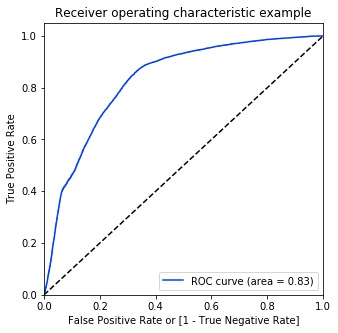

In [214]:
#Invoking the function to plot ROC - Curve. 
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.655942,0,1,1,1,1,1,1,1,1,0,0,0
1,0.0,0.332801,1,0,1,1,1,1,0,0,0,0,0,0
2,0.0,0.888576,2,1,1,1,1,1,1,1,1,1,1,0
3,0.0,0.207546,3,0,1,1,1,0,0,0,0,0,0,0
4,0.0,0.392800,4,0,1,1,1,1,0,0,0,0,0,0


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.616681  0.979129  0.254234
0.2   0.2  0.673753  0.958310  0.389197
0.3   0.3  0.721270  0.930188  0.512352
0.4   0.4  0.753353  0.898597  0.608110
0.5   0.5  0.765990  0.856958  0.675022
0.6   0.6  0.753094  0.759283  0.746906
0.7   0.7  0.658501  0.375732  0.941271
0.8   0.8  0.600989  0.240820  0.961158
0.9   0.9  0.534828  0.086799  0.982858


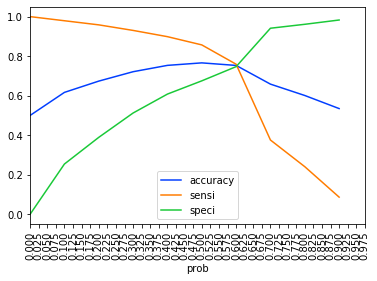

<Figure size 720x720 with 0 Axes>

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.025), rotation = 90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

**From the curve above, 0.6is the optimum point to take it as a cutoff probability.**

#### **Calculation of predicted values on the churn prob - 0.6**

In [218]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Cust_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.0,0.655942,0,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.332801,1,0,1,1,1,1,0,0,0,0,0,0,0
2,0.0,0.888576,2,1,1,1,1,1,1,1,1,1,1,0,1
3,0.0,0.207546,3,0,1,1,1,0,0,0,0,0,0,0,0
4,0.0,0.392800,4,0,1,1,1,1,0,0,0,0,0,0,0


#### **Metrics calculation for after choosing final probability cut off.**

In [219]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7530944119322596

In [220]:
#Confusion matrix after probability cutoff - 0.35 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14422,  4887],
       [ 4648, 14661]], dtype=int64)

In [221]:
#Confusion Matrix - Calculating all parameters.
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [222]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7592832357967787

In [223]:
# Let us calculate specificity
TN / float(TN+FP)

0.7469055880677404

In [224]:
# Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
print(FP/ float(TN+FP))

0.25309441193225957


In [225]:
# Positive predictive value 
print (TP / float(TP+FP))

0.75


In [226]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7562663869952806


### *Model Evaluation on Test Set*

- **ACCURACY - 75%**

- **SENSITIVITY - 76%**

- **SPECIFICITY - 75%**


Our final model had the below predicted variables:
    
- offnet_mou_diff                    
- roam_og_mou_diff                   
- total_rech_num_GoodPhase           
- total_rech_num_diff                
- total_amt_spend_rech_diff          
- std_og_t2m_mou_diff                
- vbc_3g_diff                        
- last_day_rch_amt_diff        


## ***Step 10 : Building High Performance models with PCA***

### ***PCA - MODEL***

In [227]:
#Importing all the required packages for PCA 
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [228]:
X_train_new.shape

(38618, 68)

In [229]:
#Fit the model using PCA
pca.fit(X_train_new)

PCA(random_state=42)

In [230]:
#List of components obtained from PCA after dimensionality reduction. 
pca.components_

array([[ 0.00685357,  0.0121987 , -0.00268932, ..., -0.0209535 ,
        -0.01794792,  0.00299083],
       [ 0.03216507,  0.04548276,  0.05395916, ...,  0.07745154,
         0.08318778,  0.06402628],
       [ 0.10244902,  0.1180515 ,  0.18898047, ...,  0.20298811,
         0.2068623 ,  0.15729804],
       ...,
       [ 0.01720203, -0.00691886, -0.00353043, ...,  0.16149302,
         0.44862019, -0.03728827],
       [-0.00757264,  0.00612226,  0.00518019, ..., -0.03356904,
        -0.07419979, -0.00948339],
       [-0.0032221 , -0.00129929, -0.0053418 , ...,  0.04465629,
         0.12193287, -0.00228031]])

In [231]:
#Inspection of explained_variance_ratio
pca.explained_variance_ratio_

array([3.94616024e-01, 9.43435629e-02, 5.63150237e-02, 4.66081928e-02,
       4.02204593e-02, 3.66393252e-02, 2.56117581e-02, 2.32273165e-02,
       2.11141374e-02, 1.69093967e-02, 1.64195012e-02, 1.36982816e-02,
       1.34724876e-02, 1.28391343e-02, 1.07325472e-02, 1.00081291e-02,
       8.99837699e-03, 8.54603116e-03, 8.29621828e-03, 7.98817208e-03,
       7.51824816e-03, 6.82282150e-03, 6.57075357e-03, 6.28181691e-03,
       5.77737959e-03, 5.65347684e-03, 5.25281561e-03, 4.90280608e-03,
       4.61982214e-03, 4.31195712e-03, 4.21126963e-03, 4.12949054e-03,
       4.02998607e-03, 3.72340331e-03, 3.49900718e-03, 3.44760774e-03,
       3.38621974e-03, 3.26059934e-03, 3.20395365e-03, 3.04522569e-03,
       2.90284122e-03, 2.79123133e-03, 2.67094369e-03, 2.25299050e-03,
       2.23787856e-03, 2.16159817e-03, 2.00285409e-03, 1.96380532e-03,
       1.88083432e-03, 1.73877357e-03, 1.70287945e-03, 1.67615768e-03,
       1.61121142e-03, 1.55780255e-03, 1.43292611e-03, 1.36225403e-03,
      

### ***SCREE PLOT***

In [232]:
#Finding the cumulative sum
var_cumu = np.cumsum(pca.explained_variance_ratio_)

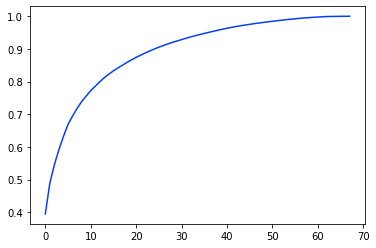

In [233]:
#Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [235]:
#Finding the explained variance ratio. 
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([39.46, 48.89, 54.52, 59.18, 63.2 , 66.86, 69.42, 71.74, 73.85,
       75.54, 77.18, 78.55, 79.9 , 81.18, 82.25, 83.25, 84.15, 85.  ,
       85.83, 86.63, 87.38, 88.06, 88.72, 89.35, 89.93, 90.5 , 91.03,
       91.52, 91.98, 92.41, 92.83, 93.24, 93.64, 94.01, 94.36, 94.7 ,
       95.04, 95.37, 95.69, 95.99, 96.28, 96.56, 96.83, 97.06, 97.28,
       97.5 , 97.7 , 97.9 , 98.09, 98.26, 98.43, 98.6 , 98.76, 98.92,
       99.06, 99.2 , 99.33, 99.46, 99.56, 99.66, 99.75, 99.83, 99.9 ,
       99.93, 99.95, 99.97, 99.98, 99.99])

- **From the model we can observe that we need 37 components to explain 95% of variance**

### ***Incremental PCA***

In [236]:
#Import the IncrementalPCA package from scikit learn. 

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=37)

In [237]:
#Fit the model on X_Train
df_train_pca = pca_final.fit_transform(X_train_new)

In [238]:
#Inspecting ths shape of the obtained dataframe. 
df_train_pca.shape

(38618, 37)

In [239]:
#Building The correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

In [240]:
#Finding the max correlations and min correlations
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008849968146032798 , min corr:  -0.0037646187532542363


### ***HeatMap***

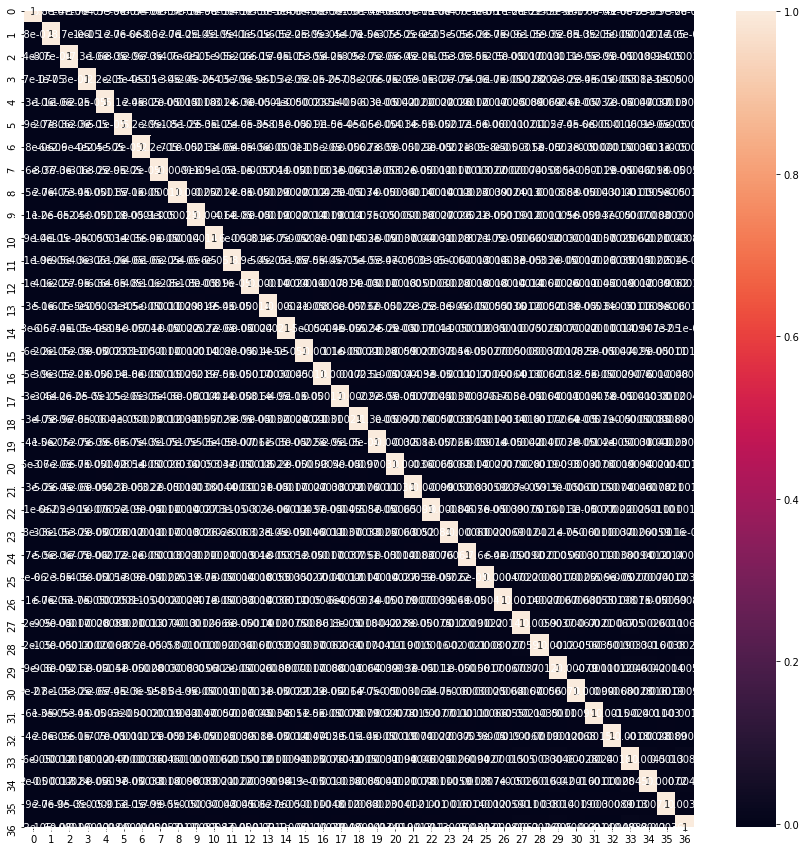

In [241]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### ***Applying PCA - Test Set***

In [242]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 37)

## ***Step 11: Logistic Regression with PCA***

### ***Use Logistic Regression to build the model***

In [243]:
#Training the model on the train data for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [244]:
#Creating the object for Logistic Regression
learner_pca = LogisticRegression(class_weight='balanced')

In [245]:
#Fit the logistic regression on the model PCA.
model_pca = learner_pca.fit(df_train_pca, y_train_new)

In [246]:
#Predicting the AUC score 
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.86'

In [299]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_train_new, model_pca.predict(df_train_pca))
confusion

array([[15053,  4256],
       [ 3140, 16169]], dtype=int64)

In [300]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_train_new, model_pca.predict(df_train_pca)),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.81
Sensitivity:  0.84
Specificity:  0.78
false postive rate:  0.22
positive predictive value:  0.79
Negative predictive value:  0.83
Misclassification Rate:  0.0 2


**Model Evaluation on Train Set**

- **ACCURACY - 81%**
- **SENSITIVITY - 84%**
- **SPECIFICITY - 78%**

### ***Test Data Evaluation***

In [247]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [248]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))

print(metrics.accuracy_score(y_test,y_pred_default))

[[6499 1752]
 [ 160  590]]
0.7875791578713476


In [249]:
#Calculation of Final Model characteristics.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8569578952819928

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

0.6750220104614428

In [252]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.32497798953855717


In [253]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8251456064826538


In [254]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [255]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8598752474447542


### ***ROC Curve***

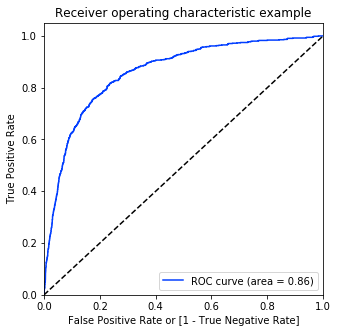

In [256]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [257]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.241383,1,1,1,0,0,0,0,0,0,0
1,1.0,0.697555,1,1,1,1,1,1,1,0,0,0
2,0.0,0.542345,1,1,1,1,1,1,0,0,0,0
3,0.0,0.253957,1,1,1,0,0,0,0,0,0,0
4,1.0,0.964931,1,1,1,1,1,1,1,1,1,1


In [258]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.399178  0.347715  0.965333
0.2   0.2  0.546162  0.511453  0.928000
0.3   0.3  0.654150  0.632287  0.894667
0.4   0.4  0.729252  0.718216  0.850667
0.5   0.5  0.787579  0.787662  0.786667
0.6   0.6  0.833907  0.843777  0.725333
0.7   0.7  0.873236  0.895164  0.632000
0.8   0.8  0.902344  0.941825  0.468000
0.9   0.9  0.916343  0.979396  0.222667


### ***Precision - Recall Trade off***

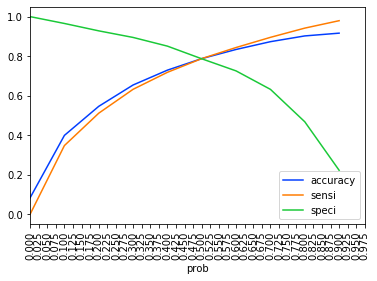

<Figure size 720x720 with 0 Axes>

In [259]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.025), rotation = 90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

**From the curve above, 0.5 is the optimum point to take it as a cutoff probability.**

In [260]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.churn.value_counts()

0.0    8251
1.0     750
Name: churn, dtype: int64

### Confusion matrix 

In [261]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6499, 1752],
       [ 160,  590]], dtype=int64)

In [262]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_test,y_pred_default),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.79
Sensitivity:  0.79
Specificity:  0.79
false postive rate:  0.21
positive predictive value:  0.25
Negative predictive value:  0.98
Misclassification Rate:  0.0 2


### ***Final Model - Test Data Evaluation after ROC***

- **ACCURACY - 79%**
- **SENSITIVITY - 79%**
- **SPECIFICITY - 79%**

## ***Step 12: Random Forest Classifier***

### ***Model Building***

In [263]:
#Import the required packages from sklearn
from sklearn.ensemble import RandomForestClassifier

In [264]:
#Create an object for RandomForestClassifier. 
RFC_balanced = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [265]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [266]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RFC_balanced, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [267]:
%%time
grid_search.fit(df_train_pca,y_train_new)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 30.5min finished


Wall time: 30min 46s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [268]:
#Best estimator
rf_best = grid_search.best_estimator_

### ***Model Evaluation before ROC***

In [270]:
confusion_Train = confusion_matrix(y_train_new , rf_best.predict(df_train_pca))

TP = confusion_Train[1,1] # true positive 
TN = confusion_Train[0,0] # true negatives
FP = confusion_Train[0,1] # false positives
FN = confusion_Train[1,0] # false negatives

print("Performance matrices on train data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_train_new,rf_best.predict(df_train_pca)),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on train data:
Accuracy Score:  0.97
Sensitivity:  0.99
Specificity:  0.95
false postive rate:  0.05
positive predictive value:  0.96
Negative predictive value:  0.99
Misclassification Rate:  0.0 2


In [271]:
confusion_Test = confusion_matrix(y_test, rf_best.predict(df_test_pca))

TP = confusion_Test[1,1] # true positive 
TN = confusion_Test[0,0] # true negatives
FP = confusion_Test[0,1] # false positives
FN = confusion_Test[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_test ,rf_best.predict(df_test_pca)),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.89
Sensitivity:  0.6
Specificity:  0.91
false postive rate:  0.09
positive predictive value:  0.38
Negative predictive value:  0.96
Misclassification Rate:  0.0 2


### ***ROC curve***

In [272]:
#Making prediction on the test data
pred_test = rf_best.predict_proba(df_test_pca)
y_pred_default = rf_best.predict(df_test_pca)

In [273]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

### ***AUC Metric***

In [274]:
#Import packages for ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8671183290914233


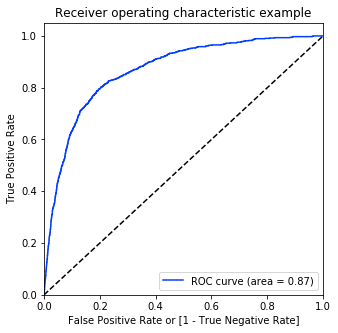

In [275]:
#Draw ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [276]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.235197,1,1,1,0,0,0,0,0,0,0
1,1.0,0.380683,1,1,1,1,0,0,0,0,0,0
2,0.0,0.338220,1,1,1,1,0,0,0,0,0,0
3,0.0,0.082409,1,0,0,0,0,0,0,0,0,0
4,1.0,0.604478,1,1,1,1,1,1,1,0,0,0


In [277]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.404066  0.352685  0.969333
0.2   0.2  0.682702  0.665374  0.873333
0.3   0.3  0.798689  0.798812  0.797333
0.4   0.4  0.856016  0.869107  0.712000
0.5   0.5  0.886235  0.912132  0.601333
0.6   0.6  0.904344  0.944249  0.465333
0.7   0.7  0.915454  0.968489  0.332000
0.8   0.8  0.918342  0.986183  0.172000
0.9   0.9  0.917898  0.996000  0.058667


### ***Sensitivity and Specificity Trade off***

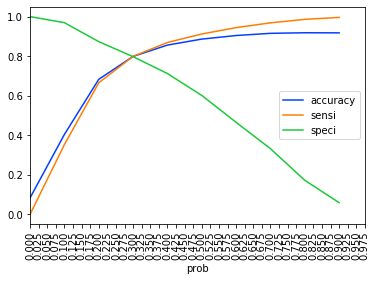

<Figure size 720x720 with 0 Axes>

In [278]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.025), rotation = 90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

In [279]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.3 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.churn.value_counts()

0.0    8251
1.0     750
Name: churn, dtype: int64

### ***Evaluation metric after ROC***

In [280]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_test,y_pred_default),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.89
Sensitivity:  0.8
Specificity:  0.8
false postive rate:  0.2
positive predictive value:  0.26
Negative predictive value:  0.98
Misclassification Rate:  0.0 2


## ***Step 13 : XG_Boost Algorithm with PCA***

### ***Model 1***

In [281]:
from sklearn import ensemble

# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [282]:
#Gradient Boosting
GBC.fit(df_train_pca,y_train_new)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=10,
                           n_estimators=200, random_state=9999, subsample=0.5)

              precision    recall  f1-score   support

         0.0       0.98      0.77      0.86      8251
         1.0       0.24      0.78      0.37       750

    accuracy                           0.77      9001
   macro avg       0.61      0.78      0.62      9001
weighted avg       0.91      0.77      0.82      9001

Accuracy for the test dataset 77.5%
ROC for the test dataset 84.7%


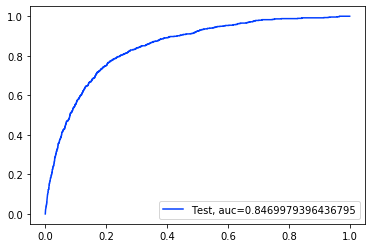

In [283]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### ***Hyper Paramter Tuning***

In [284]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

# Fit classifier with out-of-bag estimates
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2), param_grid = params, scoring='recall',n_jobs=-1,iid=False, cv=None,verbose=2)

In [285]:
#Fit The model 
gsearch1.fit(df_train_pca,y_train_new)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1875 out of 1875 | elapsed: 14.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3231           0.0432           37.96s
         2           1.2807           0.0409           43.07s
         3           1.2399           0.0384           44.43s
         4           1.2000           0.0365           41.77s
         5           1.1678           0.0321           38.82s
         6           1.1302           0.0328           38.08s
         7           1.1002           0.0292           38.87s
         8           1.0784           0.0261           38.99s
         9           1.0529           0.0247           39.53s
        10           1.0198           0.0242           39.23s
        11           0.9962           0.0229           39.50s
        12           0.9685           0.0211           39.34s
        13           0.9608           0.0196           39.15s
        14           0.9301           0.0189           38.18s
        15           0.9093           0.0188           37.15s
       

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='recall', verbose=2)

In [286]:
#Best estimator
gb_best = grid_search.best_estimator_

### ***Model Evaluation before ROC***

In [288]:
confusion_Train = confusion_matrix(y_train_new , gb_best.predict(df_train_pca))

TP = confusion_Train[1,1] # true positive 
TN = confusion_Train[0,0] # true negatives
FP = confusion_Train[0,1] # false positives
FN = confusion_Train[1,0] # false negatives

print("Performance matrices on train data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_train_new,gb_best.predict(df_train_pca)),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on train data:
Accuracy Score:  0.97
Sensitivity:  0.99
Specificity:  0.95
false postive rate:  0.05
positive predictive value:  0.96
Negative predictive value:  0.99
Misclassification Rate:  0.0 2


In [289]:
confusion_Test = confusion_matrix(y_test, gb_best.predict(df_test_pca))

TP = confusion_Test[1,1] # true positive 
TN = confusion_Test[0,0] # true negatives
FP = confusion_Test[0,1] # false positives
FN = confusion_Test[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_test ,gb_best.predict(df_test_pca)),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.89
Sensitivity:  0.6
Specificity:  0.91
false postive rate:  0.09
positive predictive value:  0.38
Negative predictive value:  0.96
Misclassification Rate:  0.0 2


### ***ROC curve***

In [290]:
#Making prediction on the test data
pred_test = gb_best.predict_proba(df_test_pca)
y_pred_default = gb_best.predict(df_test_pca)

In [291]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

### ***AUC Metric***

In [292]:
#Import packages for ROC and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8671183290914233


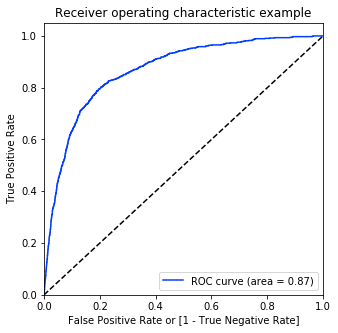

In [293]:
#Draw ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [294]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.235197,1,1,1,0,0,0,0,0,0,0
1,1.0,0.380683,1,1,1,1,0,0,0,0,0,0
2,0.0,0.338220,1,1,1,1,0,0,0,0,0,0
3,0.0,0.082409,1,0,0,0,0,0,0,0,0,0
4,1.0,0.604478,1,1,1,1,1,1,1,0,0,0


In [295]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.404066  0.352685  0.969333
0.2   0.2  0.682702  0.665374  0.873333
0.3   0.3  0.798689  0.798812  0.797333
0.4   0.4  0.856016  0.869107  0.712000
0.5   0.5  0.886235  0.912132  0.601333
0.6   0.6  0.904344  0.944249  0.465333
0.7   0.7  0.915454  0.968489  0.332000
0.8   0.8  0.918342  0.986183  0.172000
0.9   0.9  0.917898  0.996000  0.058667


### ***Sensitivity and Specificity Trade off***

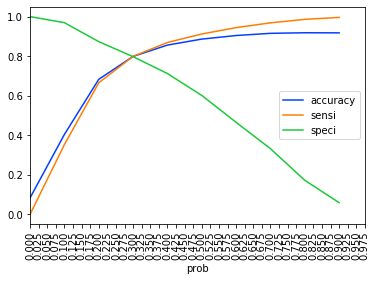

<Figure size 720x720 with 0 Axes>

In [296]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.025), rotation = 90)
plt.figure(figsize=(10,10))
plt.tight_layout()
plt.show()

In [297]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.3 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_pred_final.churn.value_counts()

0.0    8251
1.0     750
Name: churn, dtype: int64

### ***Evaluation metric after ROC***

In [298]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Performance matrices on test data:")

print('Accuracy Score: ', round(metrics.accuracy_score(y_test,y_pred_default),2))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', round(TP / float(TP+FN),2))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',round(FP/ float(TN+FP),2))

# positive predictive value 
print('positive predictive value: ', round(TP / float(TP+FP),2))

# Negative predictive value
print('Negative predictive value: ',round(TN / float(TN+ FN),2))

## Misclassification rate

print('Misclassification Rate: ',round((FN+FP)/(TP+TN+FP+FN)),2)

Performance matrices on test data:
Accuracy Score:  0.89
Sensitivity:  0.8
Specificity:  0.8
false postive rate:  0.2
positive predictive value:  0.26
Negative predictive value:  0.98
Misclassification Rate:  0.0 2


# ***Results and observations***

- Logistic Regression without PCA - 
        Train Data: Accuracy-76.59% Sensitivity-85.65% Specificity-67.50%
        Test Data:  Accuracy-75% Sensitivity-76% Specificity-75%
- Logistic Regression with PCA 
        Train Data: Accuracy-81% Sensitivity-84%  Specificity-78%
        Test Data:  Accuracy-79%  Sensitivity-79% Specificity-79%
- Random Forest Classifier - 
        Train Data: Accuracy-97% Sensitivity-99% Specificity-95%
        Test Data:  Accuracy-89% Sensitivity-80% Specificity-80%
- XGBoost Classifier 
        Train Data: Accuracy-97% Sensitivity-99% Specificity-95%
        Test Data:  Accuracy- 89% Sensitivity- 80% Specificity-80%
        
We can clearly see that Random Forest Classifier and XGBoost Classifier are overfitting.

**Logistic Regression with PCA seems to be better model out of all. So, let's make it as our final model.**


## Insights from Interpretable model(Logistic Regression without PCA)**:


**IMPORTANT FEATURES FROM INTERPRETABLE MODEL [LOGREG]**
 
 
offnet_mou_diff---------------------->(-1.8266)      
roam_og_mou_diff------------------>(5.7739)      
total_rech_num_GoodPhase--->(-0.3272)      
total_rech_num_diff---------------->(-2.5891)      
total_amt_spend_rech_diff----->(-3.1586)      
std_og_t2m_mou_diff------------->(-0.4967)      
vbc_3g_diff------------------------------>(-3.9392)      
last_day_rch_amt_diff------------->(-3.6608)

---
  
***We know that the relationship between ln(odds) of ‘y’ and the feature variable “X” is much more intuitive and easier to understand. The equation is given as:*** 
 
ln(odds)= (1.9241 *const) -(1.8266*offnet_mou_diff) -(0.3272*total_rech_num_GoodPhase)
-(2.5891*total_rech_num_diff) -3.1586*(total_amt_spend_rech_diff) - (0.4967 *std_og_t2m_mou_diff)- (3.9392 * vbc_3g_diff)
-(3.6608*last_day_rch_amt_diff)
 
***From the above equation , we can see that:***
 
- If roaming and outgoing calls (roam_og_mou_diff) increases significantly between good phase and action phase,then there is high probability of churning.

 
- If the number of calls between 2 different network decreases(offnet_mou_diff) or there is decrease in number of std calls outside network(std_og_t2m_mou_diff),there is high chances for the customer to churn.

 
- If the number of recharges decreases as well as if the amount of recharge decreases from good phase to action phase(last_day_rch_amt_diff),there is high chances for the customer to churn.

 
- If the amount spent on recharge decreases,it implies that the customer is going to churn.

 
- If the person didn't choose any specific scheme/plan and opt for more random volume based cost schemes in action phase(vbc_3g_diff),there is high probability for the user to churn.



**Business Recommendations:**

1. Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.


2. The company needs to focus on the STD rates. Perhaps, the rates are too high. Provide them with some kind of STD packages along with reasonable roaming,offnet voice calls packages.


3. The company needs to focus on plans long term plans than random volume based cost plans.


4. The company needs to concentrate more on marketing to retain the customers whose recharge amount decreaesed for action phase.


5. The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior